## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Sat Apr 13 08:40:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.0/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir datasets
%cd datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="63oApJAcS0UNO3GnmcT8")
project = rf.workspace("sks-workspace").project("soumyadeep-kar-bkl")
version = project.version(2)
dataset = version.download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.1/74.1 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully unin

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Soumyadeep-Kar-BKL-2 in yolov8:: 100%|██████████| 15662/15662 [00:02<00:00, 7665.43it/s]


## Custom Training
!yolo: The exclamation mark (!) at the beginning suggests that this is a command executed in a shell or command-line environment.

task=detect: Indicates the task to be performed, which is object detection in this case.

mode=train: Specifies that the model should be trained.

model=yolov8s.pt: Specifies the initial model checkpoint or weights file (yolov8s.pt) for training.

data={dataset.location}/data.yaml: Specifies the path to the data configuration file (data.yaml). The actual path is determined by the variable dataset.location.

epochs=30: Sets the number of training epochs to 30.

imgsz=800: Sets the image size to 800 pixels during training.

plots=True: Indicates whether to generate training plots. The value is set to True.

Please note that the exact meaning and functionality of these parameters may depend on the YOLO version or implementation you are using. Make sure to refer to the documentation of the YOLO framework or the specific tool you are using for object detection for more details on these parameters.

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=20 imgsz=800 plots=True val=True patience=5

/content
New https://pypi.org/project/ultralytics/8.1.45 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Soumyadeep-Kar-BKL-2/data.yaml, epochs=20, patience=5, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visua

In [ ]:
!ls {HOME}/runs/detect/train2/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1712669825.464b2e042887.3104.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch4040.jpg  weights
P_curve.png					    train_batch4041.jpg
PR_curve.png					    train_batch4042.jpg


/content


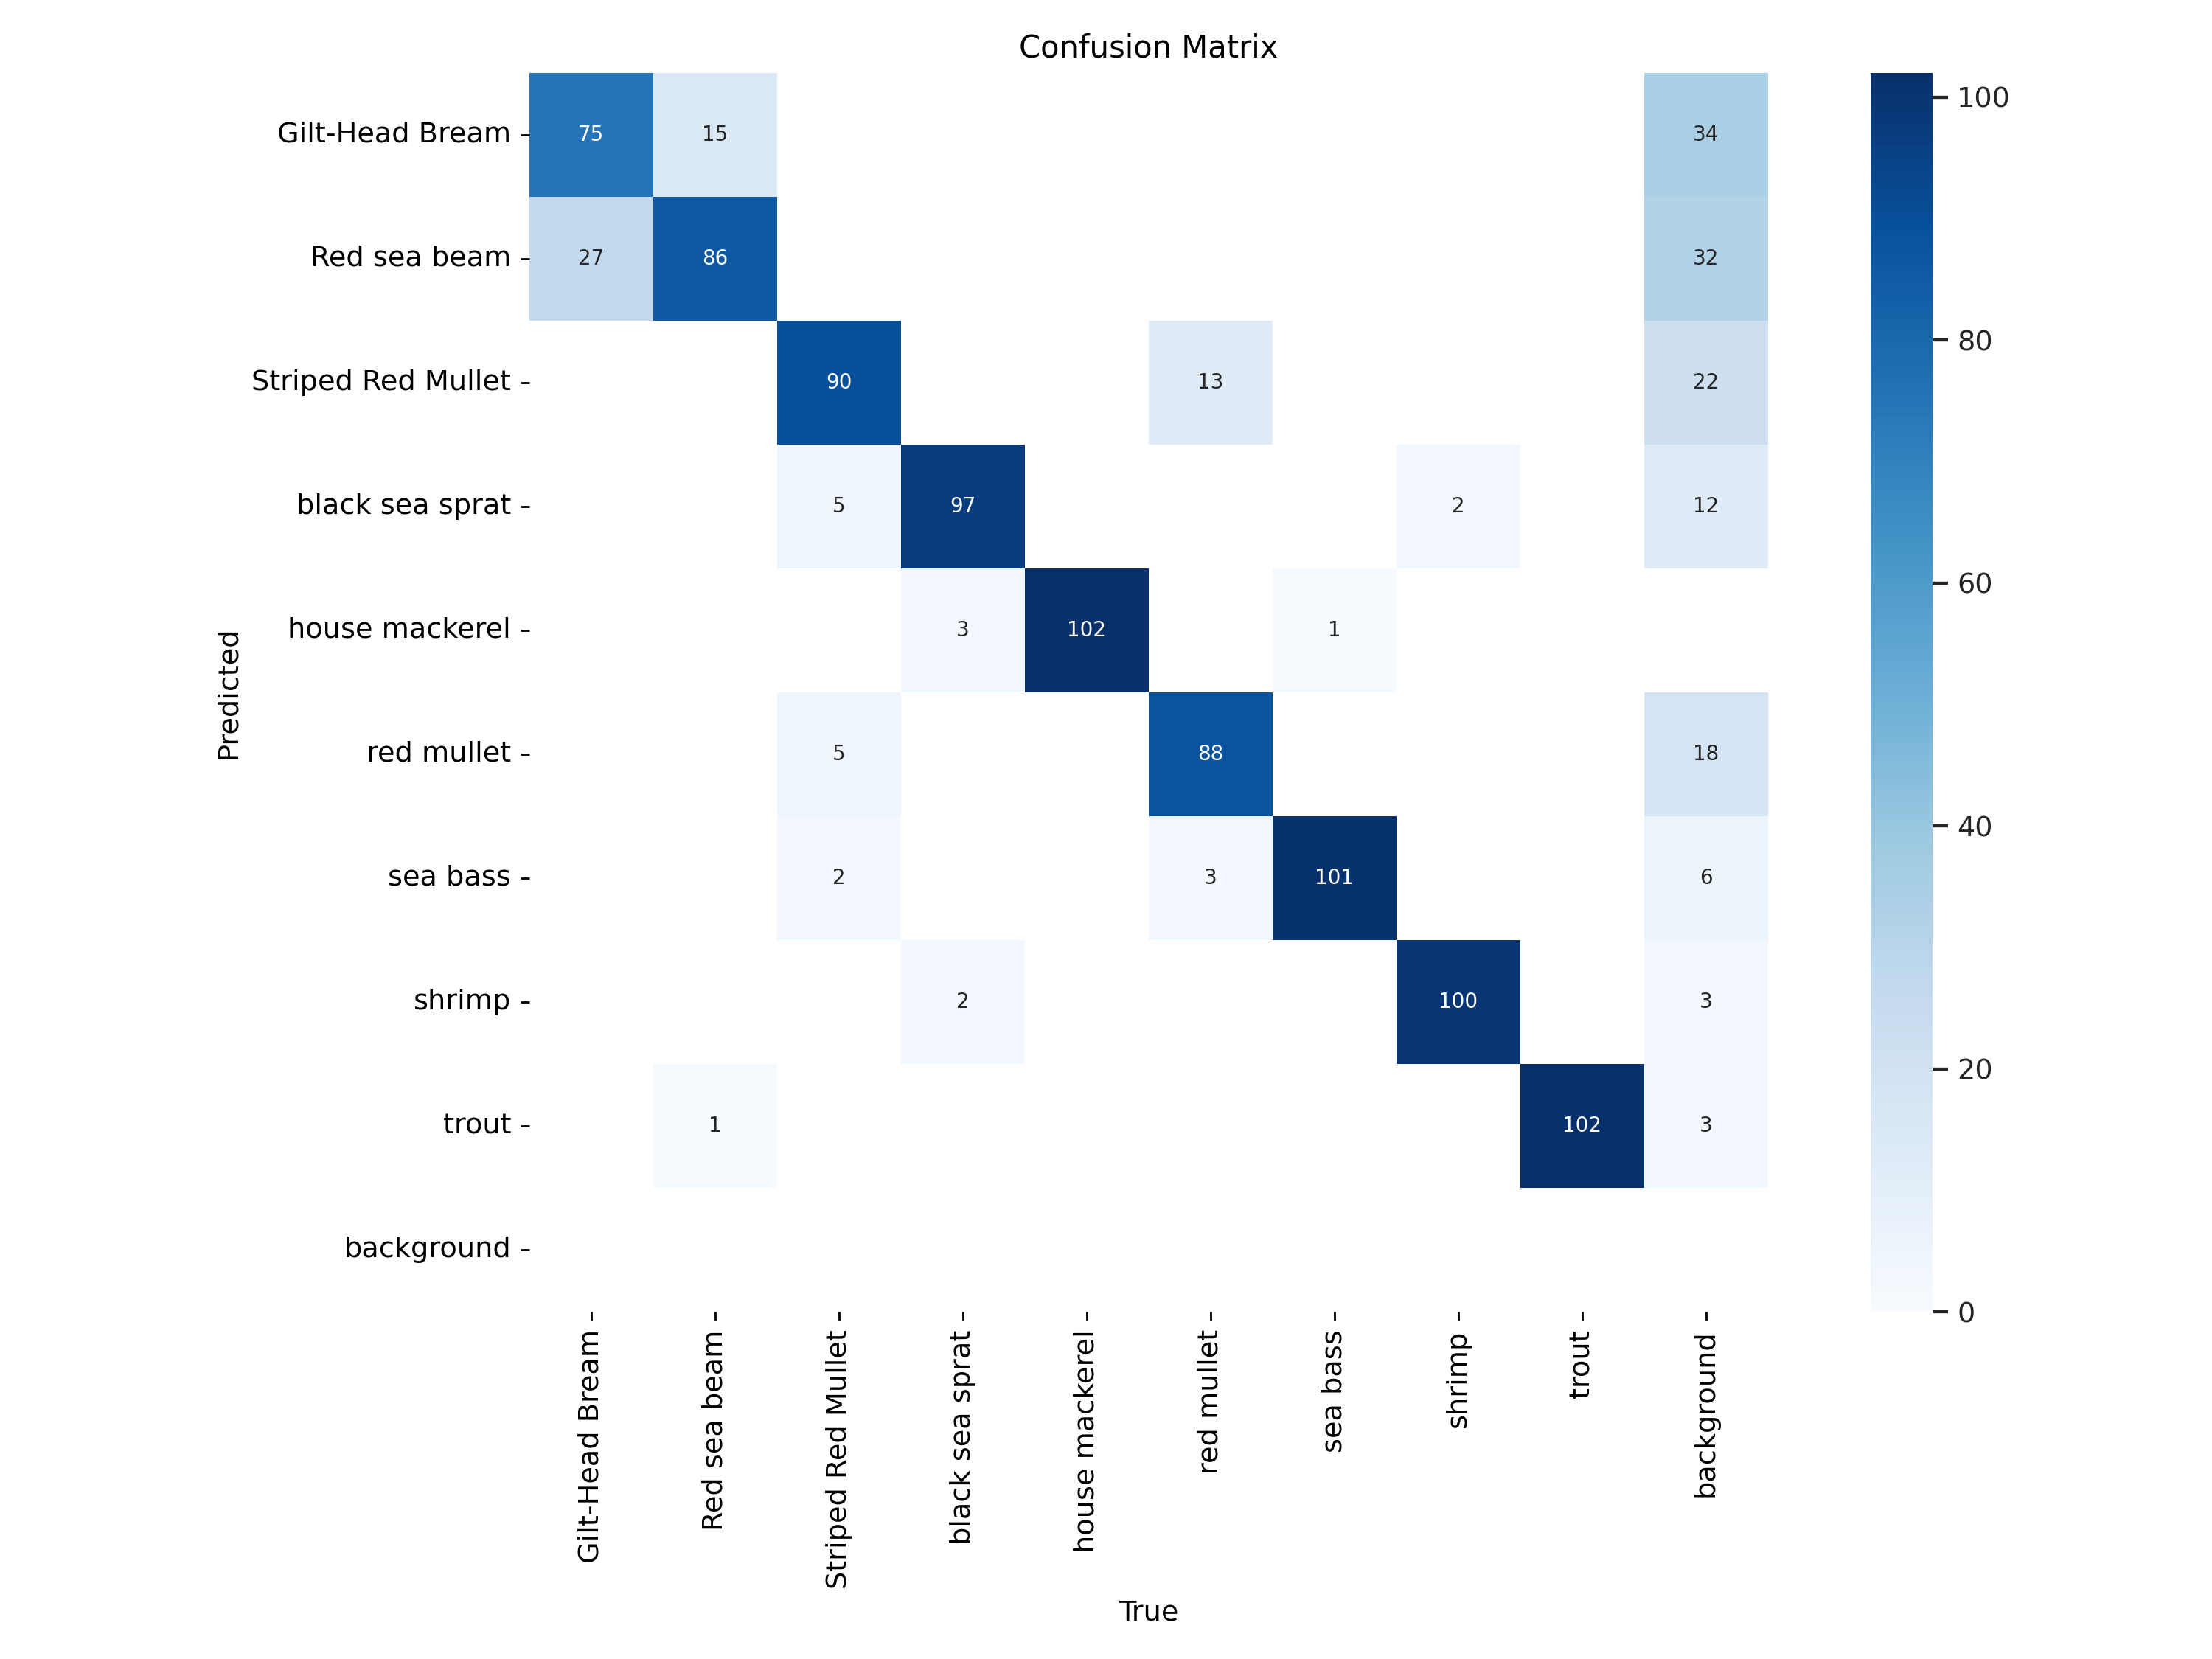

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


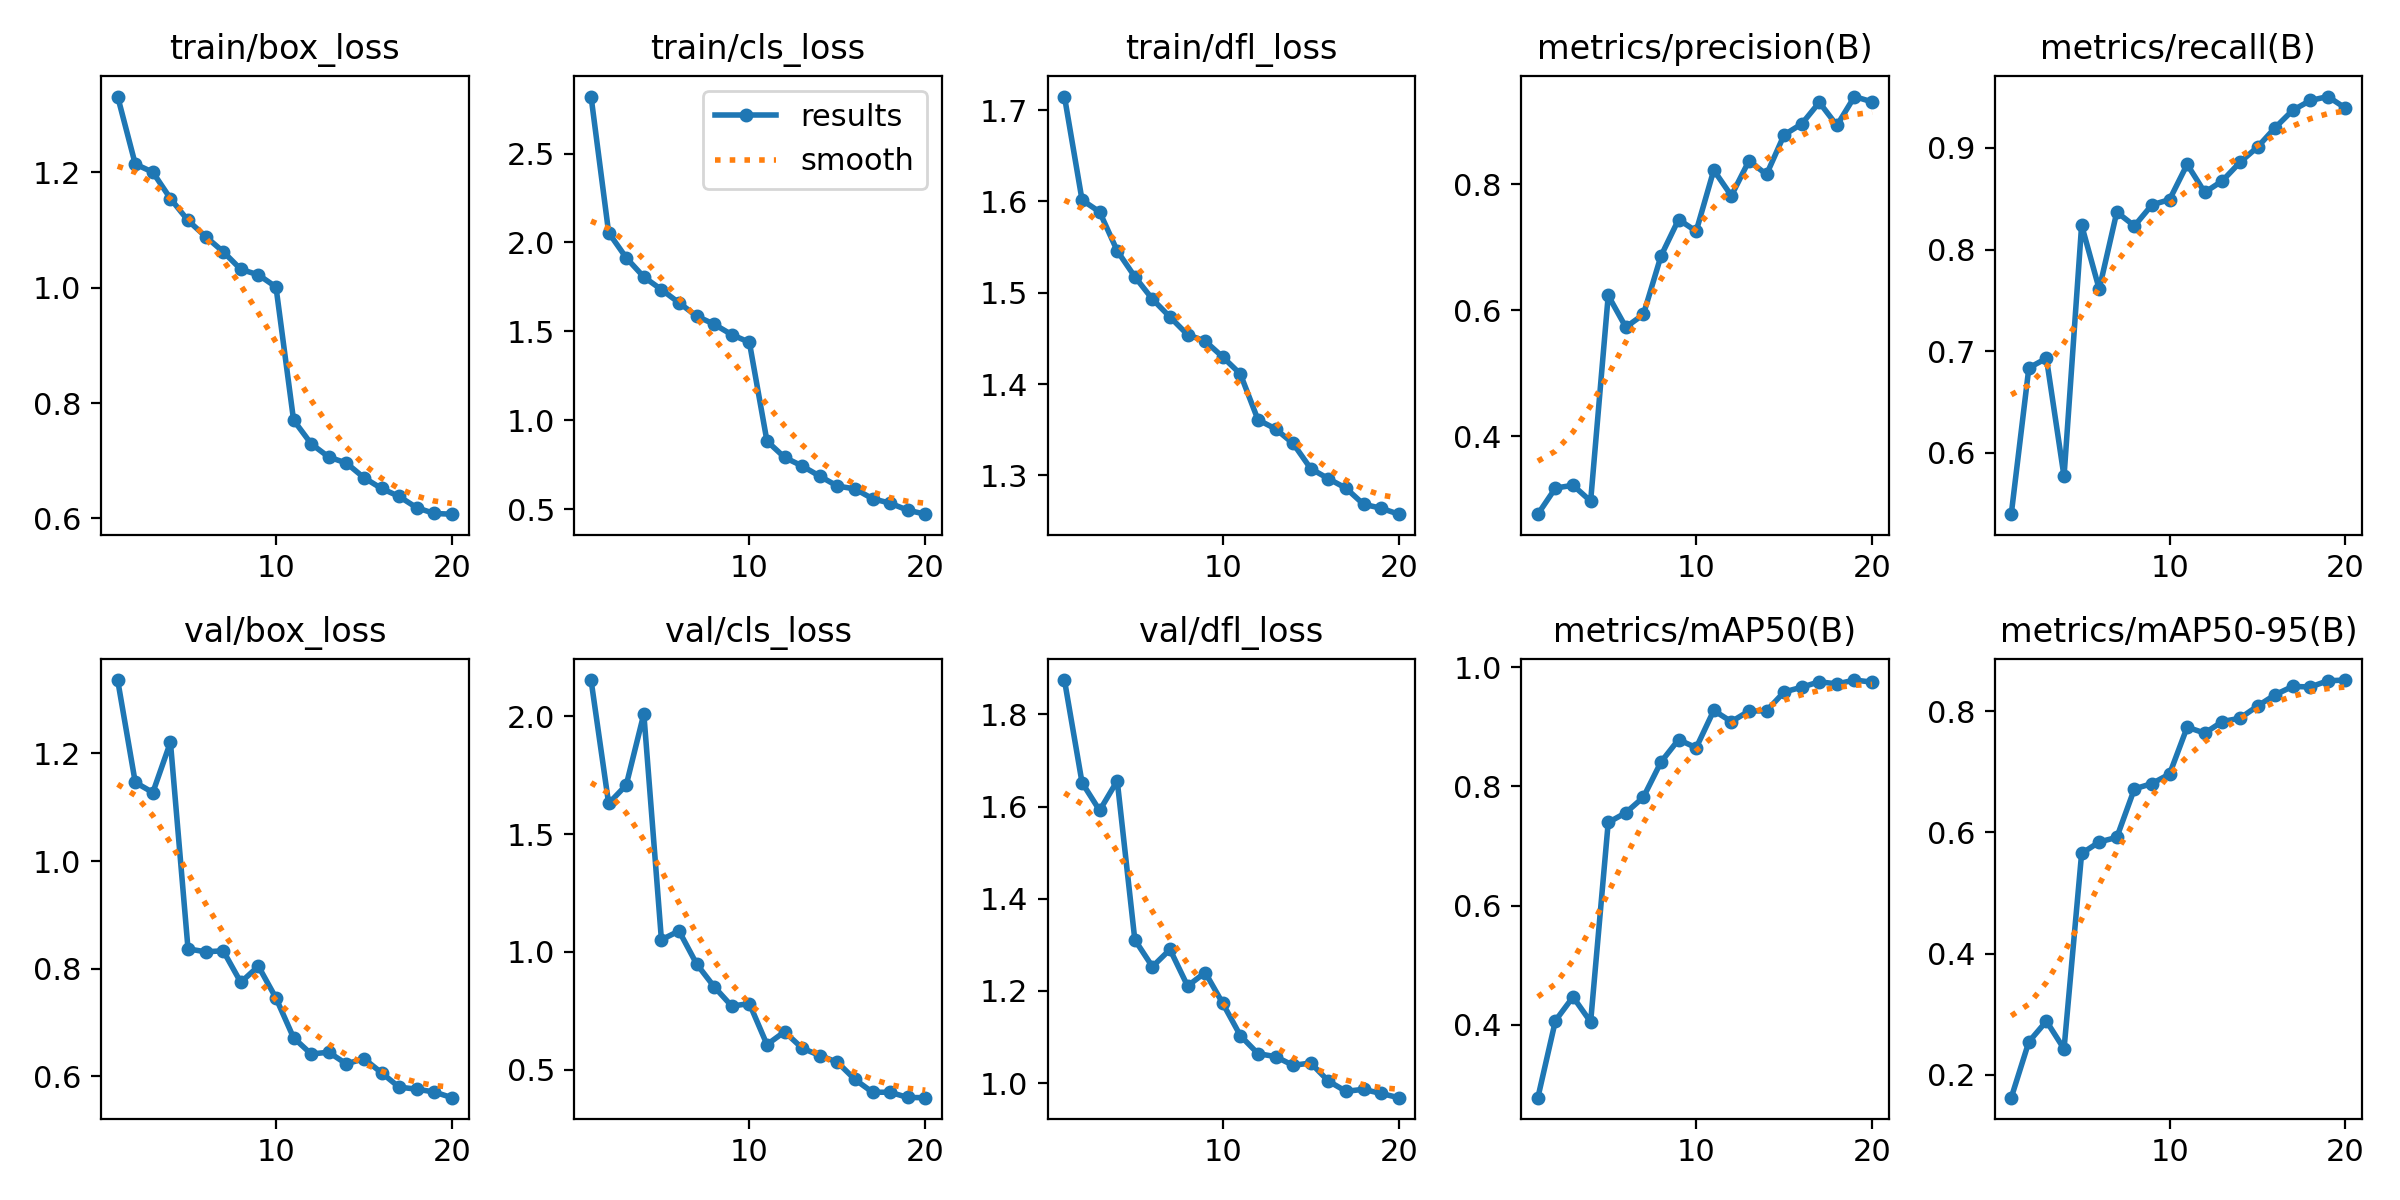

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/content


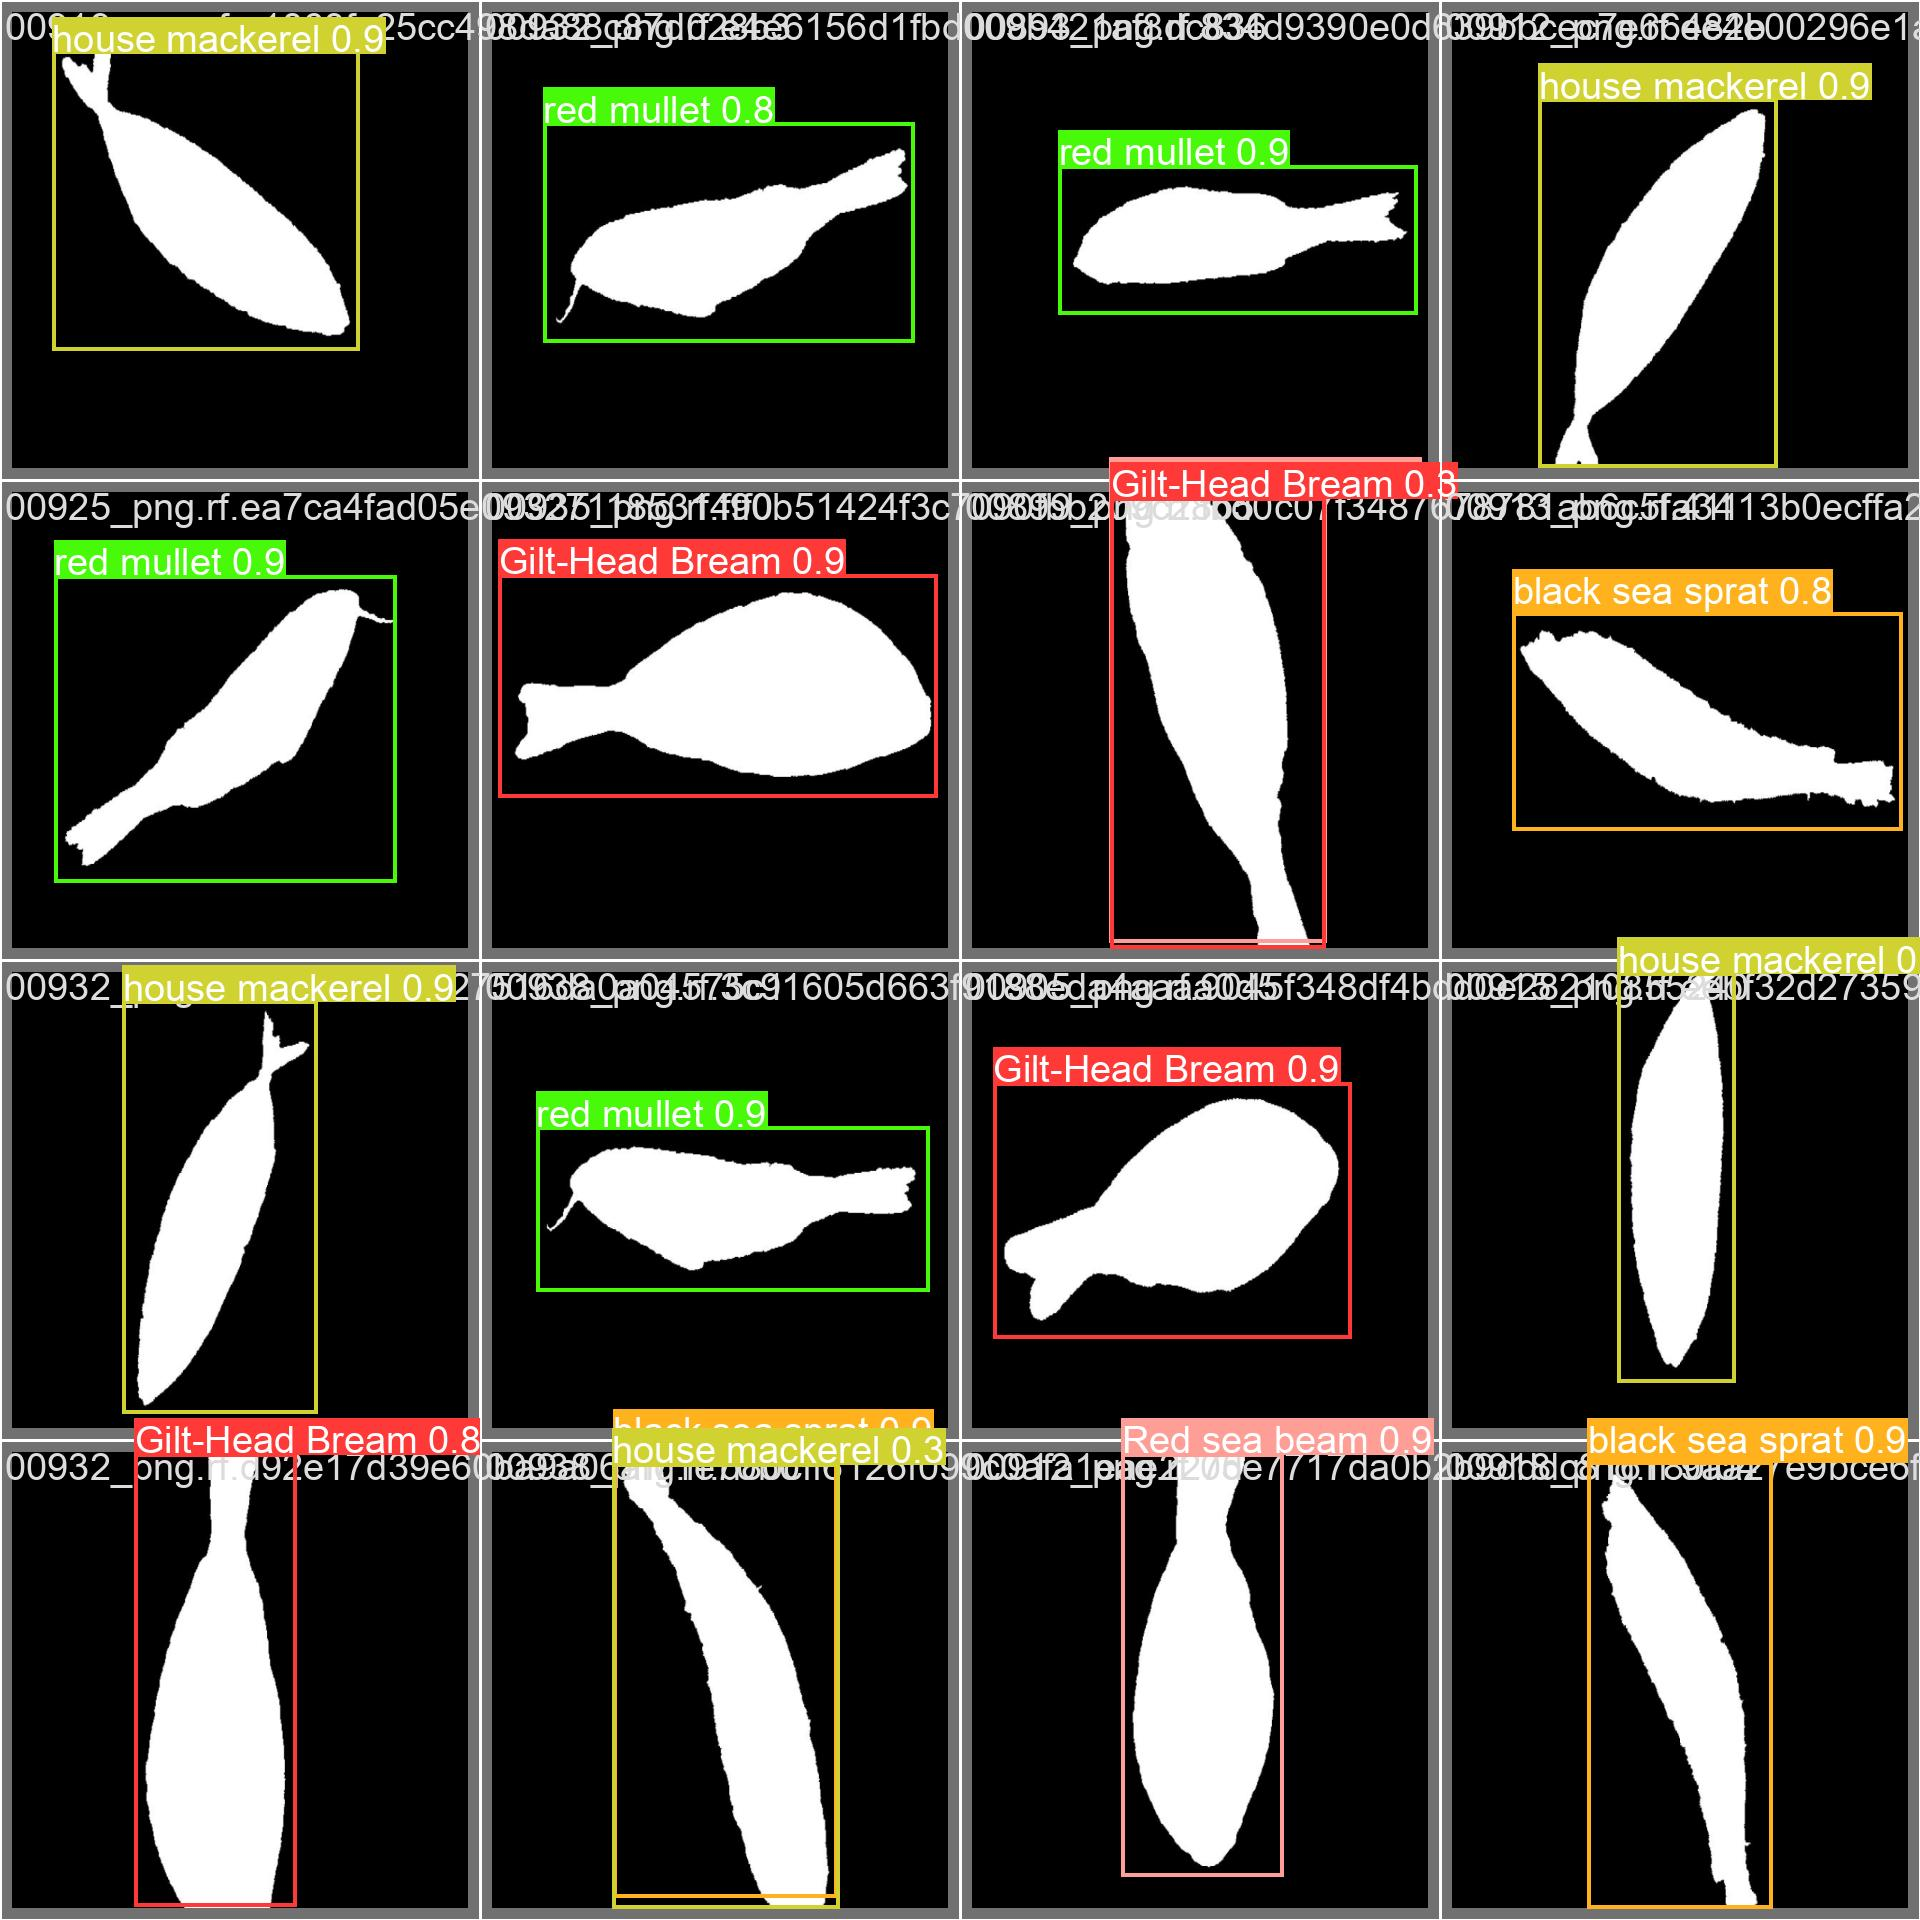

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129067 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Soumyadeep-Kar-BKL-2/valid/labels.cache... 920 images, 0 backgrounds, 0 corrupt: 100% 920/920 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 58/58 [00:18<00:00,  3.09it/s]
                   all        920        920      0.285      0.737      0.398      0.238
       Gilt-Head Bream        920        102      0.224      0.637      0.243      0.141
          Red sea beam        920        102       0.29      0.873      0.429      0.234
    Striped Red Mullet        920        102      0.23

/content


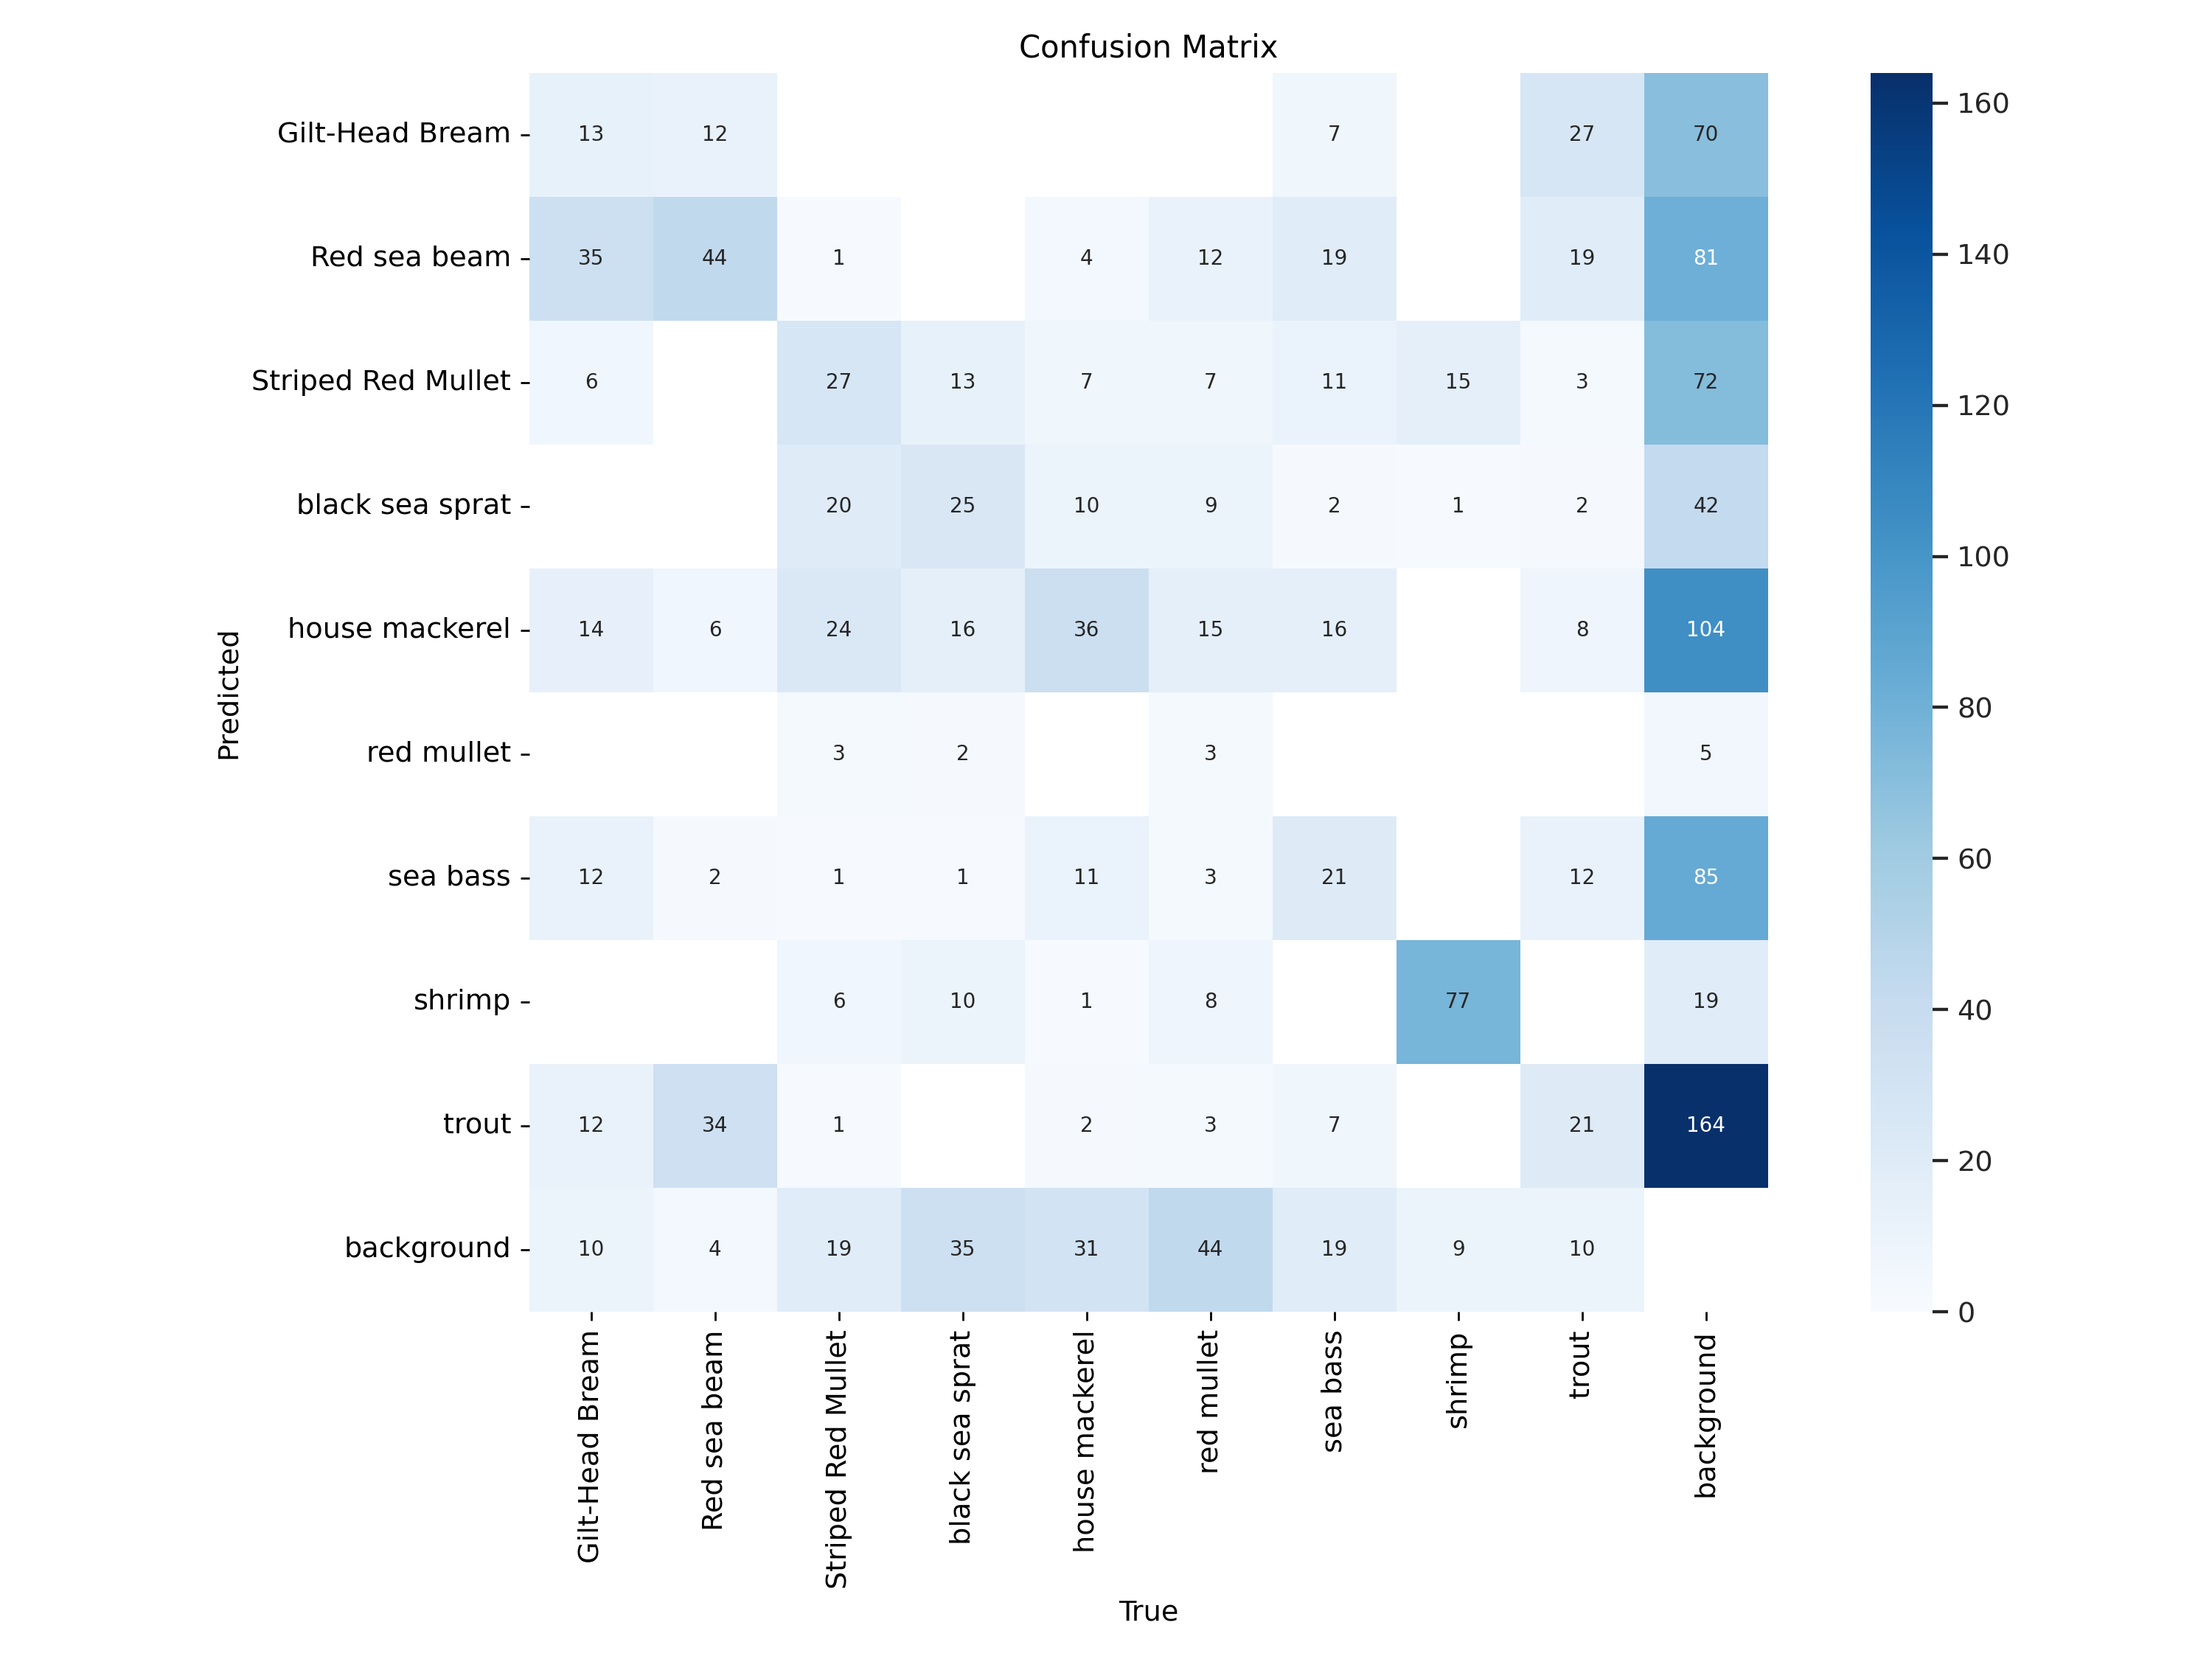

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val2/confusion_matrix.png', width=600)

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129067 parameters, 0 gradients, 28.5 GFLOPs

image 1/455 /content/datasets/Soumyadeep-Kar-BKL-2/test/images/00001_png.rf.6d13e522fde314f1d8913727b933aa71.jpg: 704x704 1 Red sea beam, 18.9ms
image 2/455 /content/datasets/Soumyadeep-Kar-BKL-2/test/images/00003_png.rf.f0978f4ece67a678b43fc953fb24aa0c.jpg: 704x704 1 Striped Red Mullet, 18.9ms
image 3/455 /content/datasets/Soumyadeep-Kar-BKL-2/test/images/00004_png.rf.8ca9c84a9b5c4eb5fd6720c6ab829326.jpg: 704x704 1 shrimp, 18.8ms
image 4/455 /content/datasets/Soumyadeep-Kar-BKL-2/test/images/00006_png.rf.49034373c65bb08bb1bbeb6aa6ea22c0.jpg: 704x704 1 Gilt-Head Bream, 18.9ms
image 5/455 /content/datasets/Soumyadeep-Kar-BKL-2/test/images/00007_png.rf.37b0d8952246de04a2ac336d627f1726.jpg: 704x704 1 trout, 18.9ms
image 6/455 /content/datasets/Soumyadeep-Kar-BKL-2/test/images/00007_png.rf.6ea3454796d4415abc819407

**NOTE:** Let's take a look at few results.

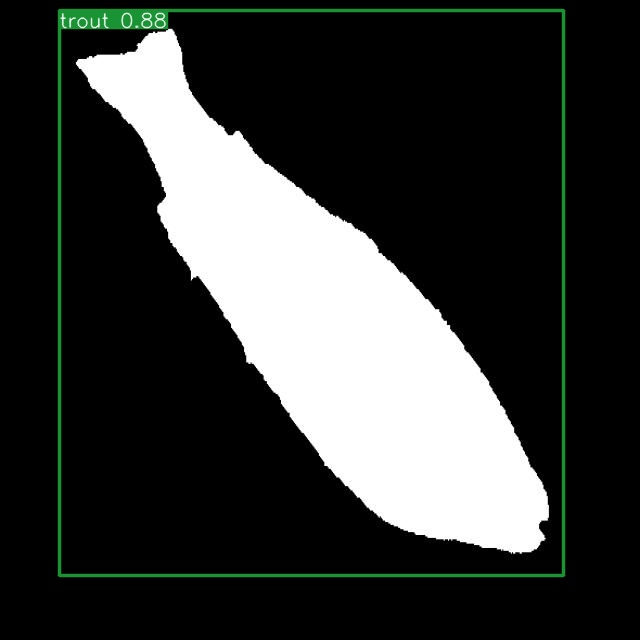

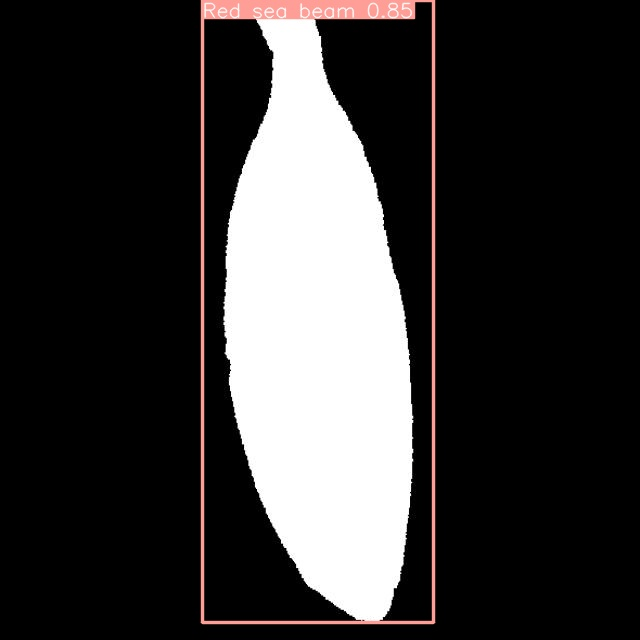

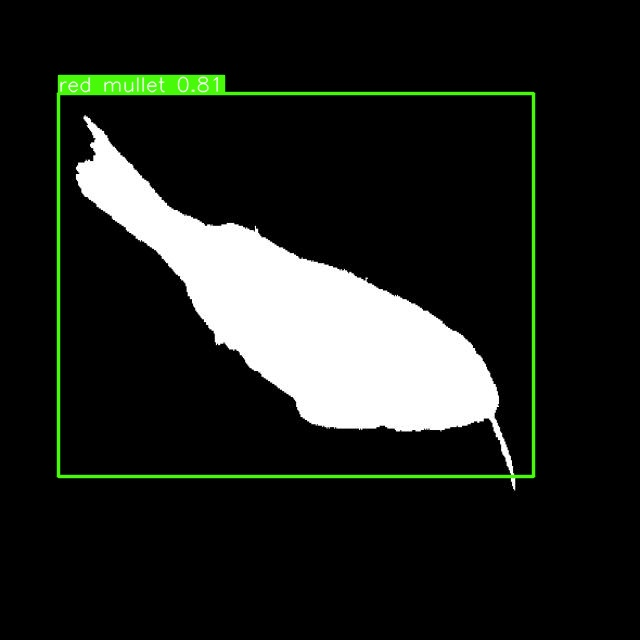

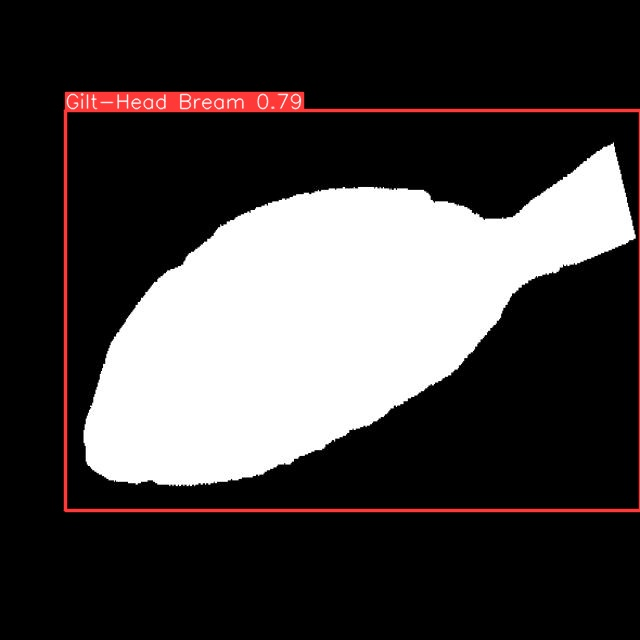

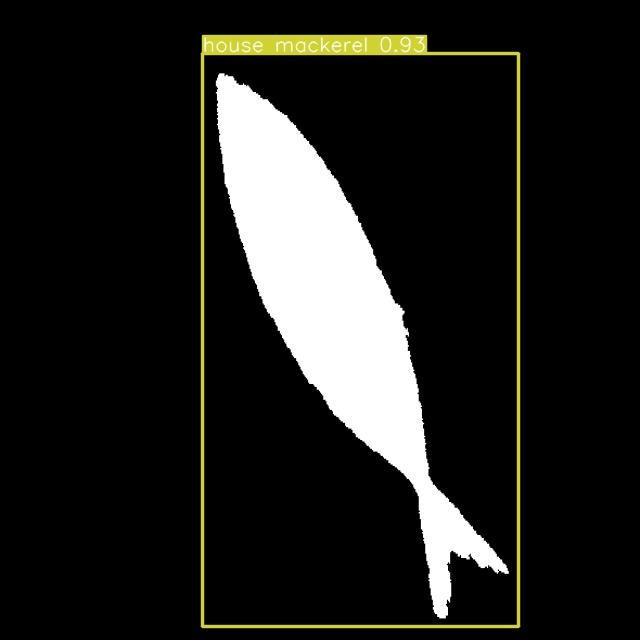

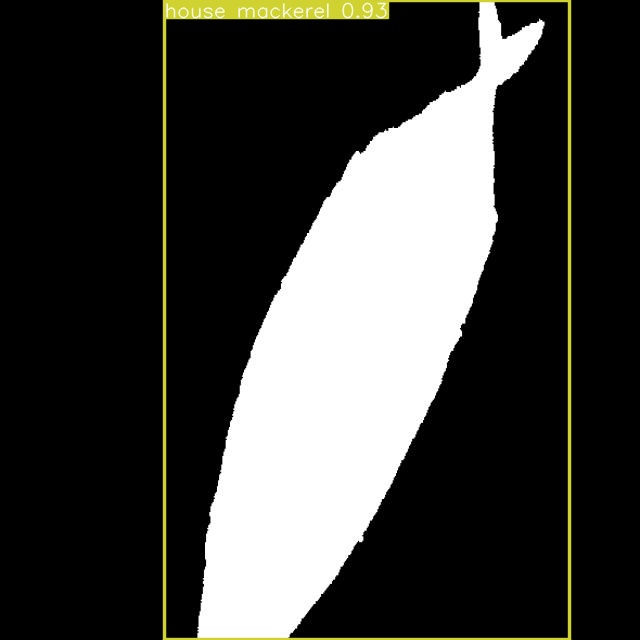

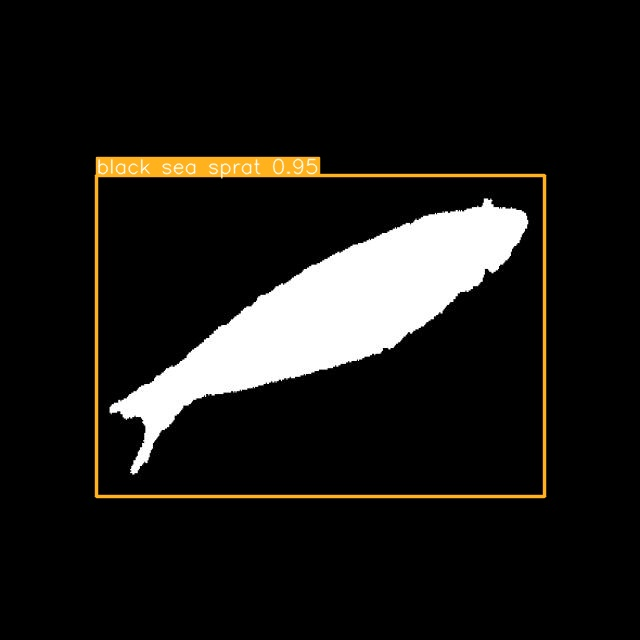

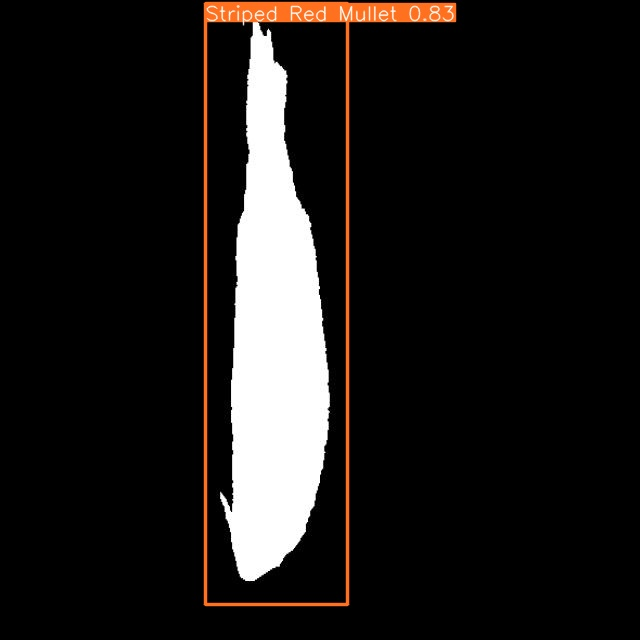

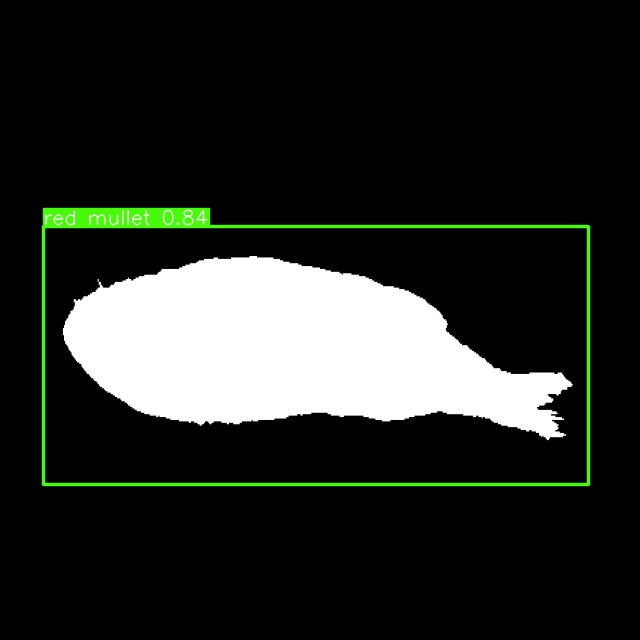

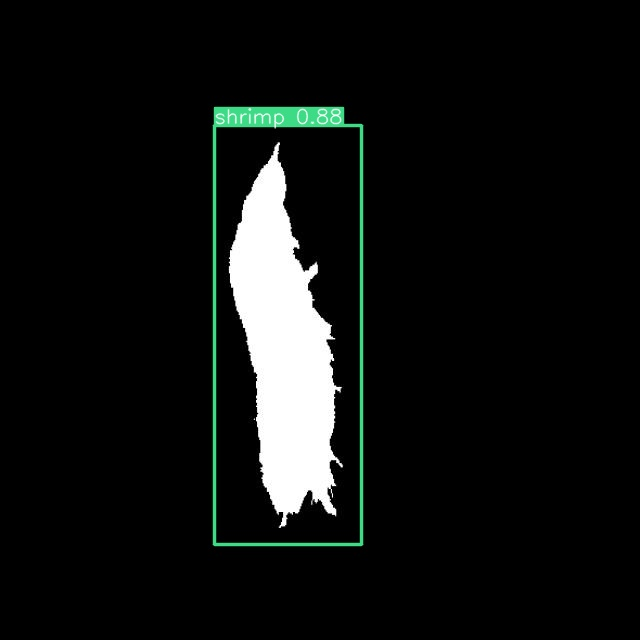

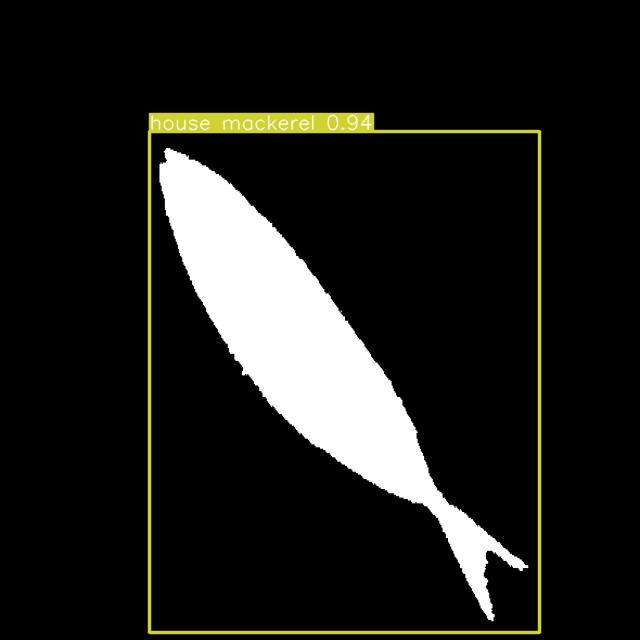

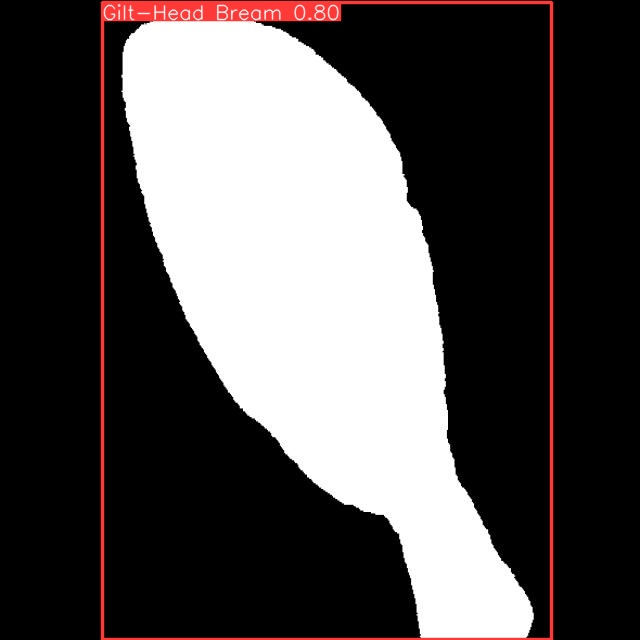

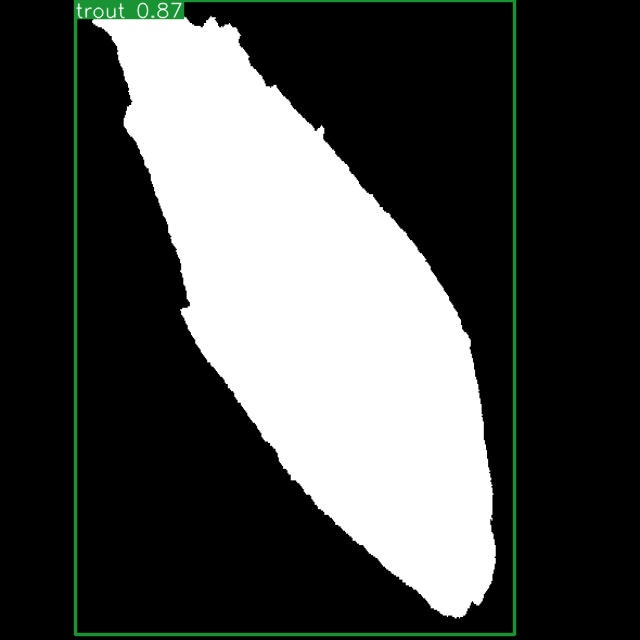

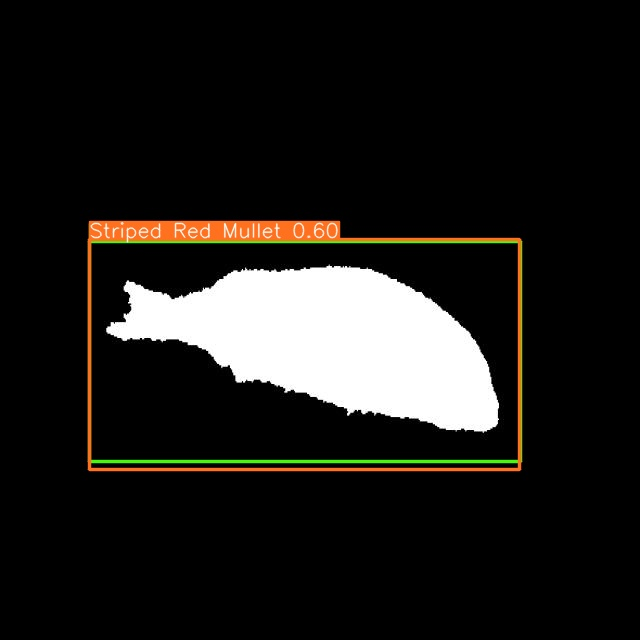

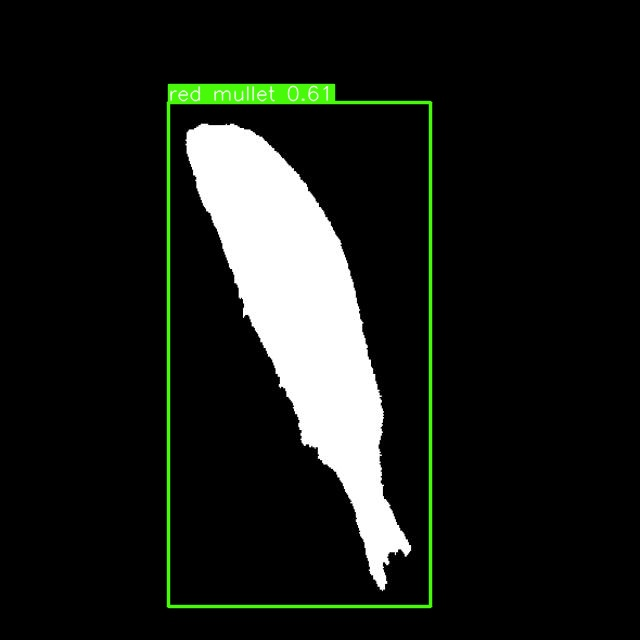

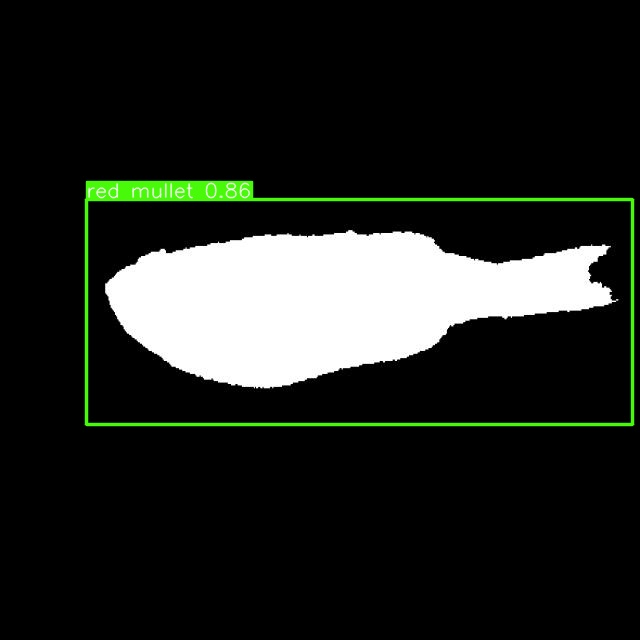

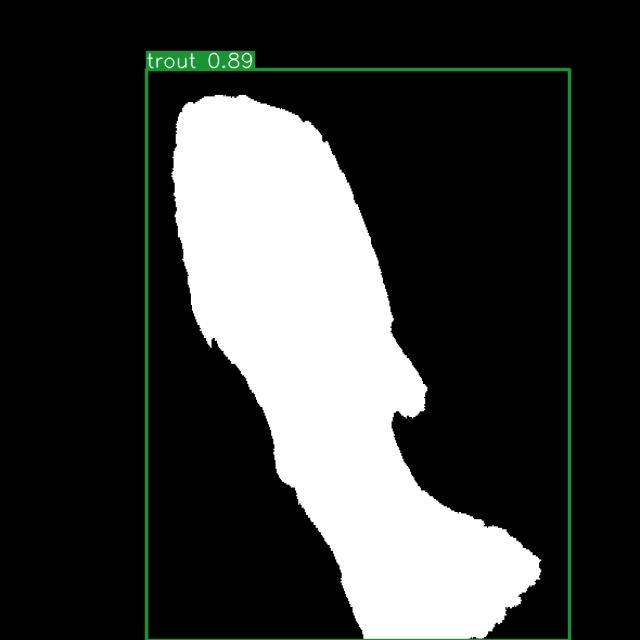

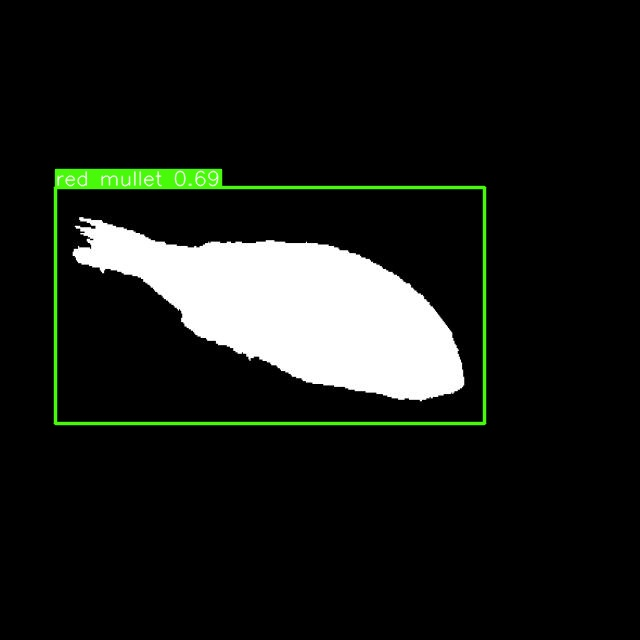

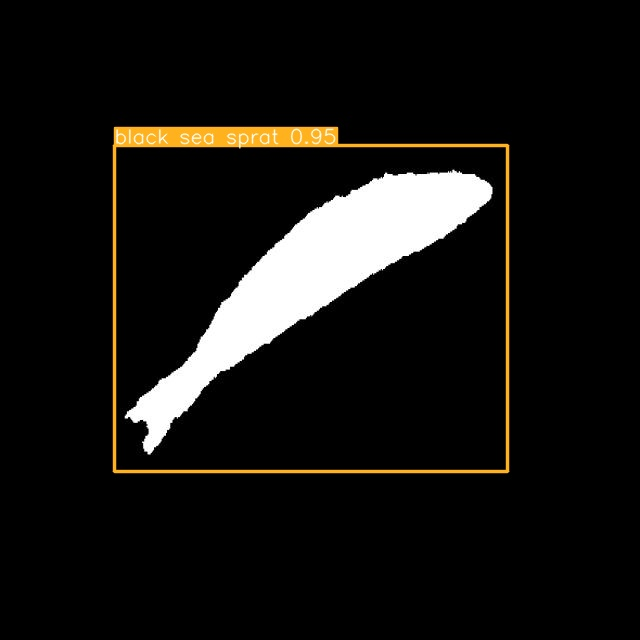

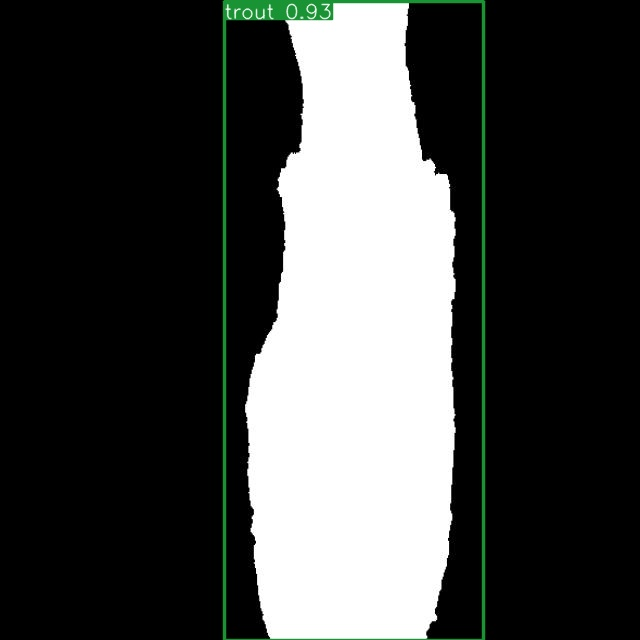

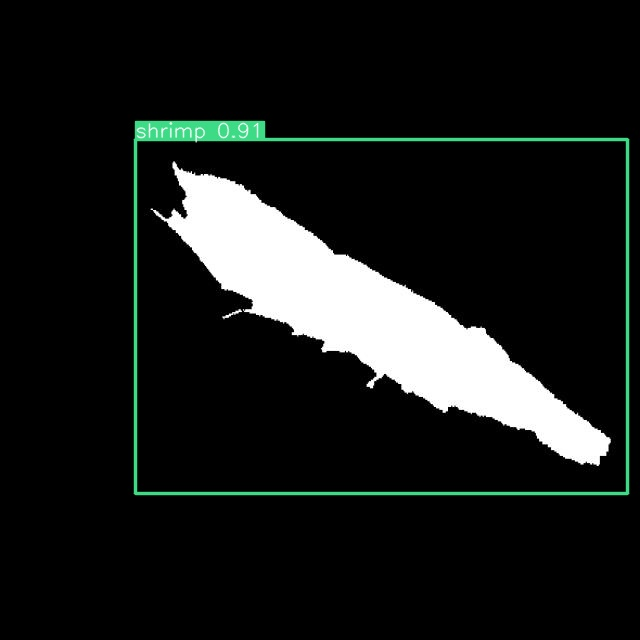

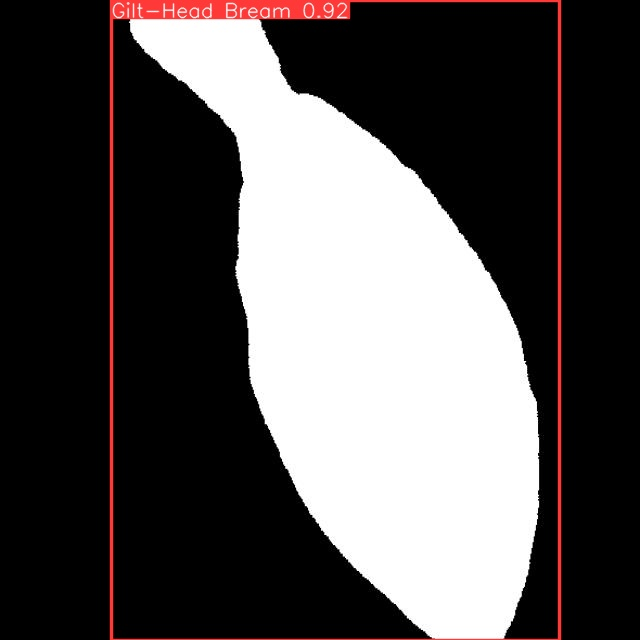

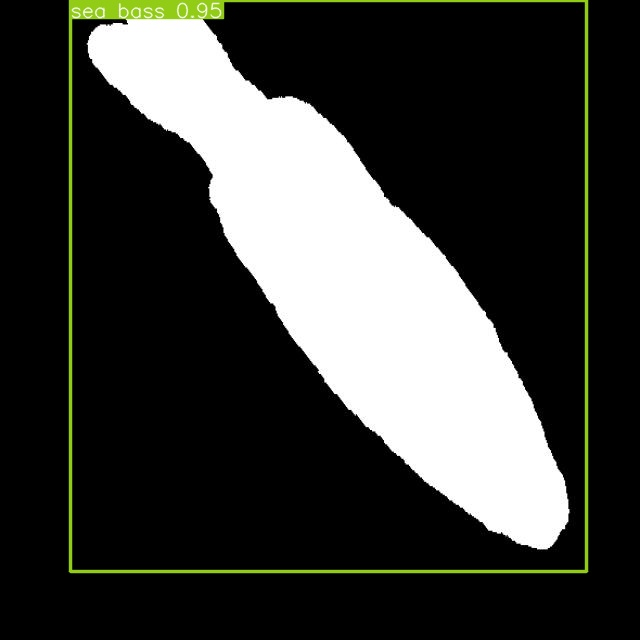

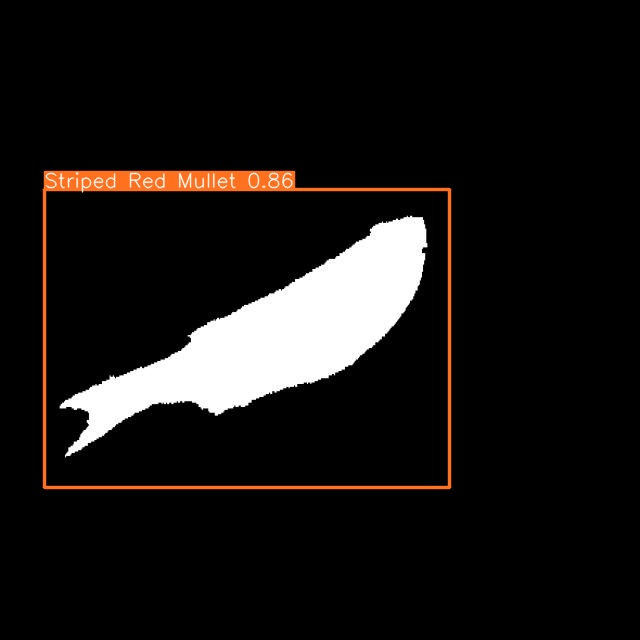

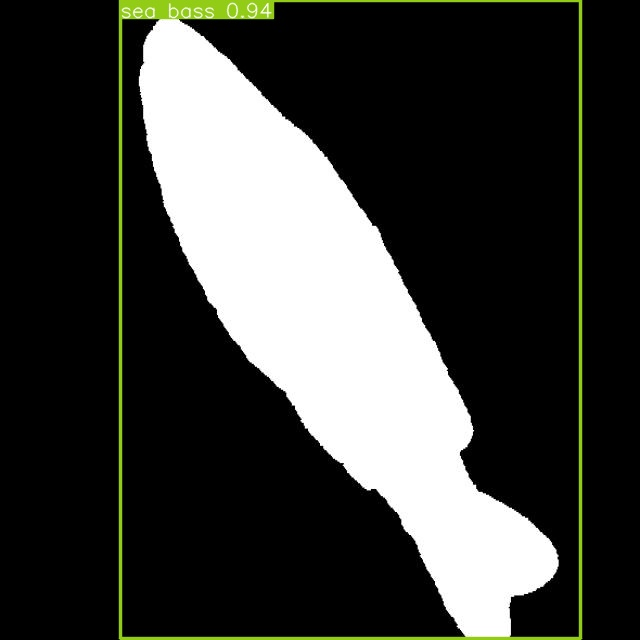

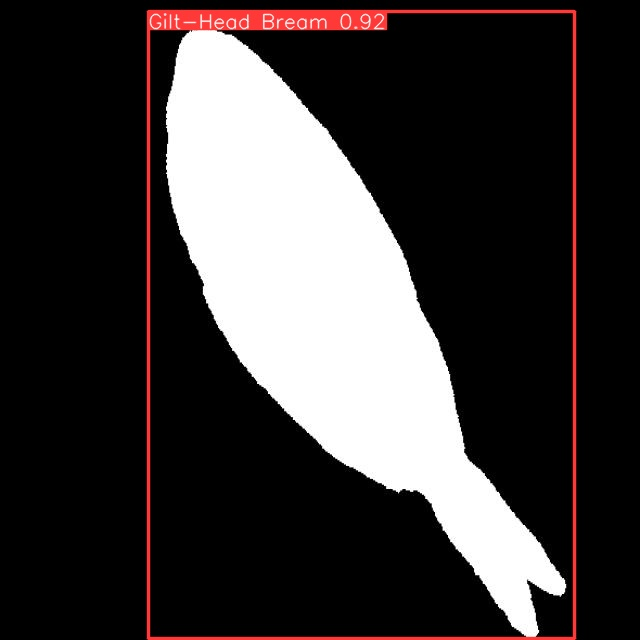

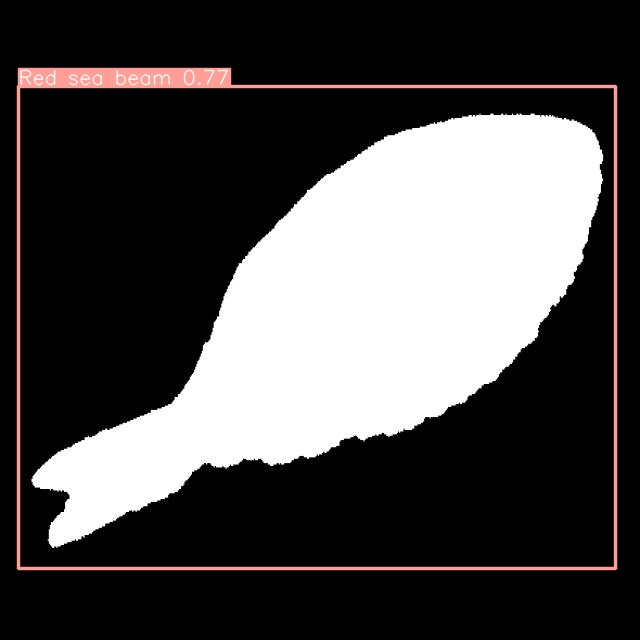

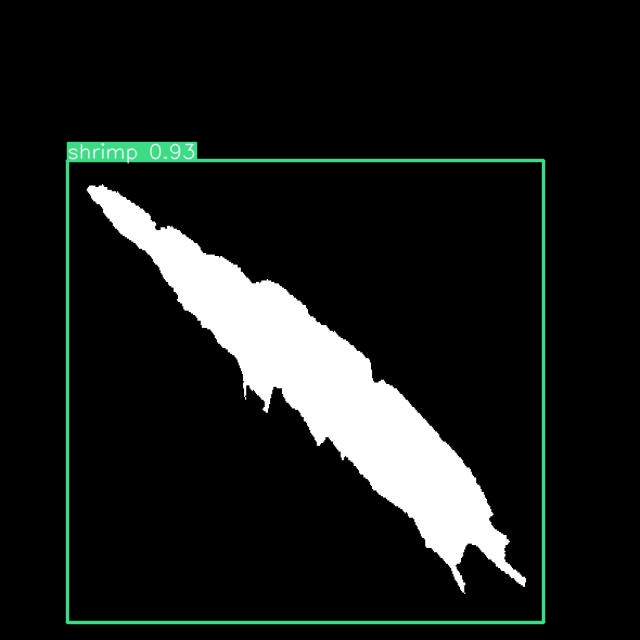

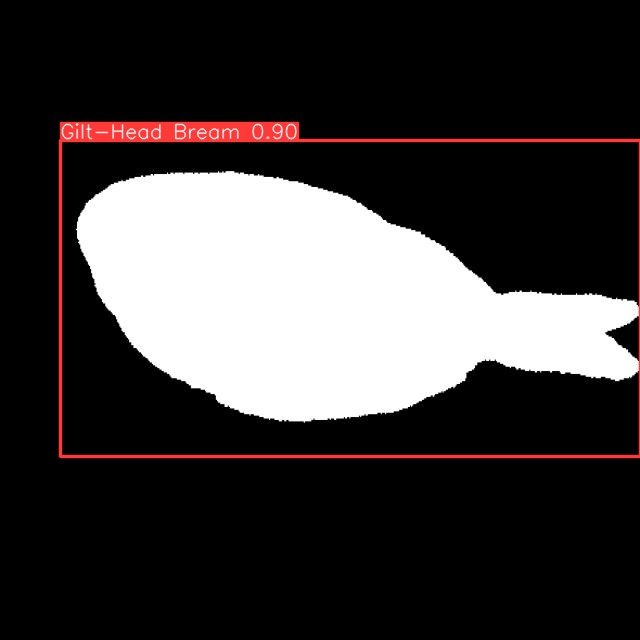

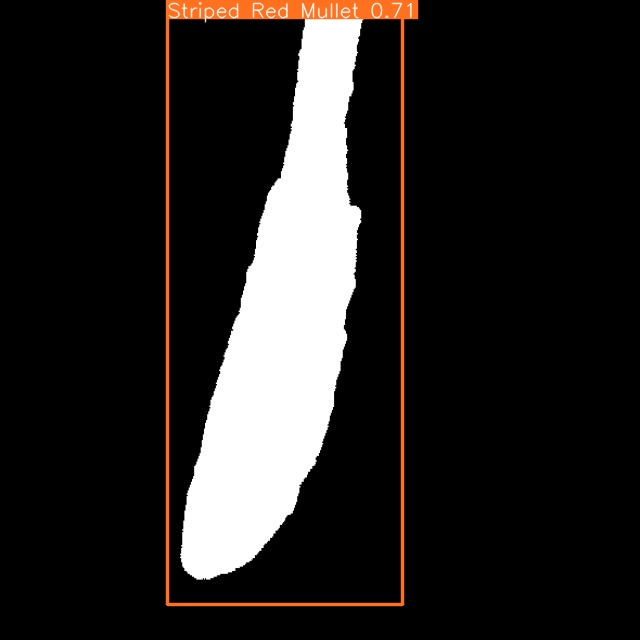

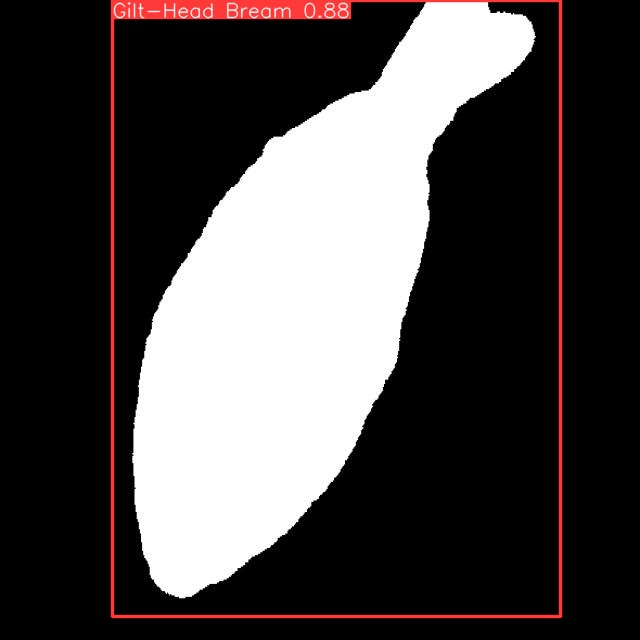

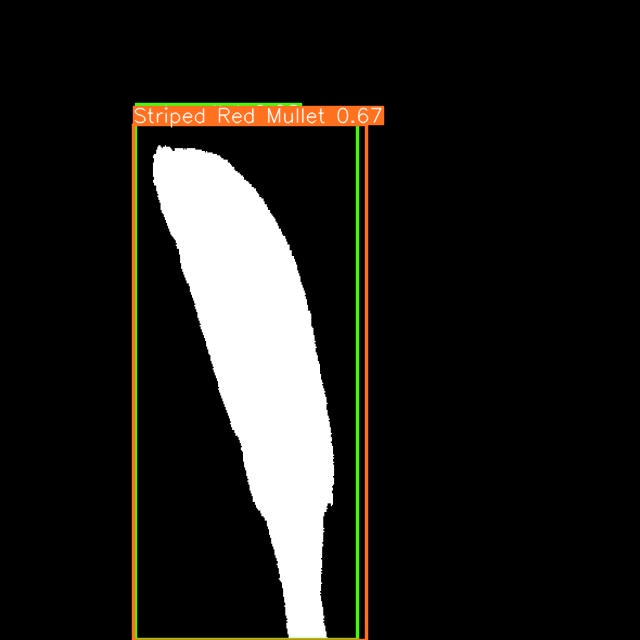

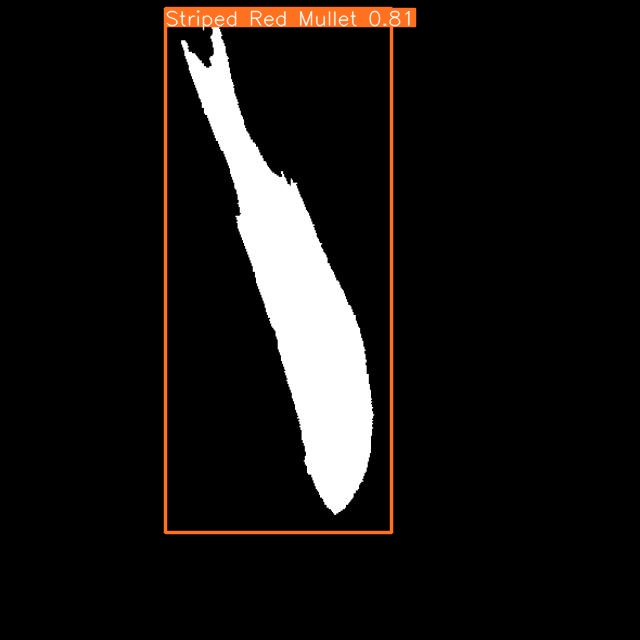

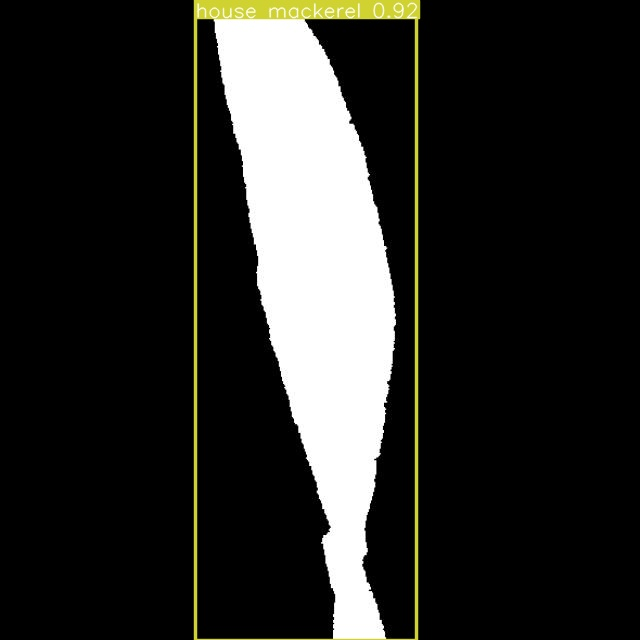

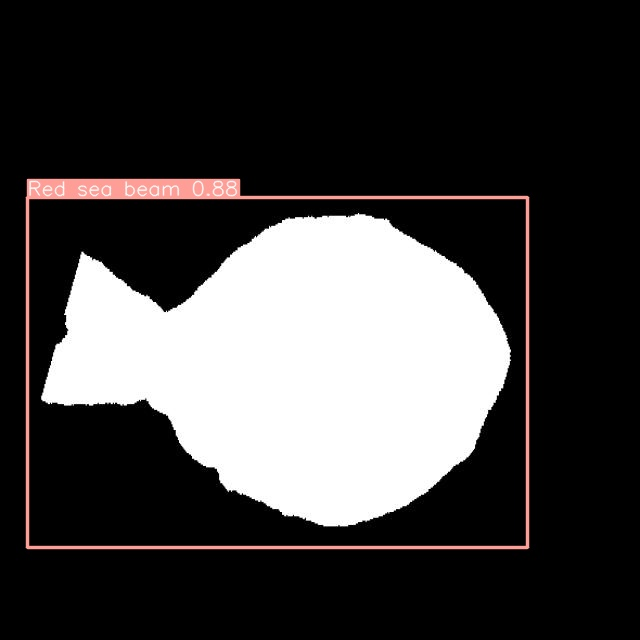

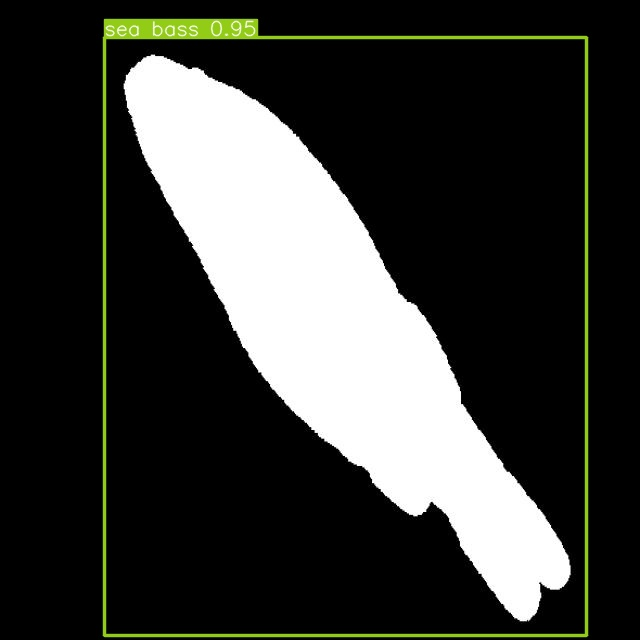

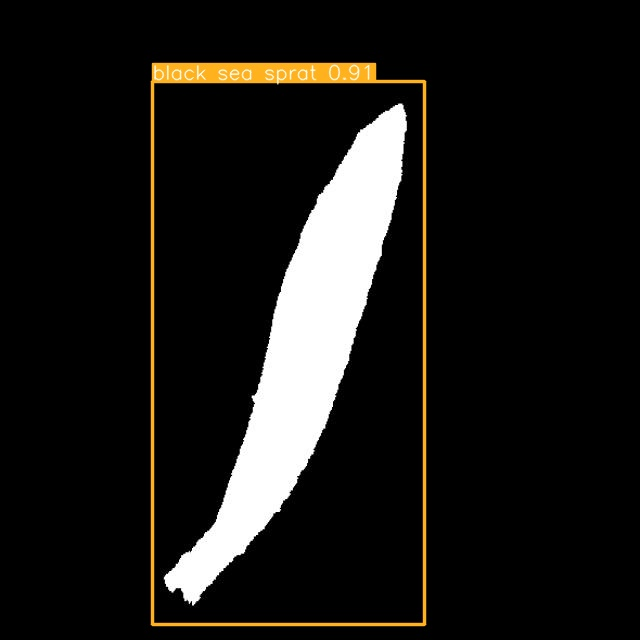

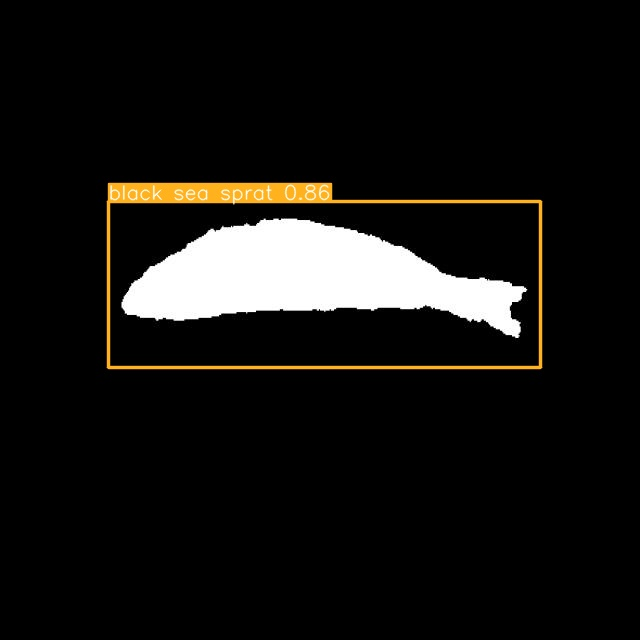

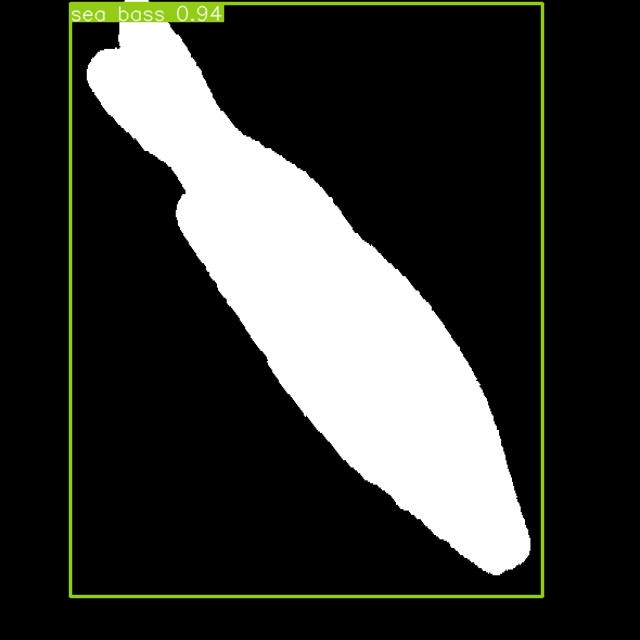

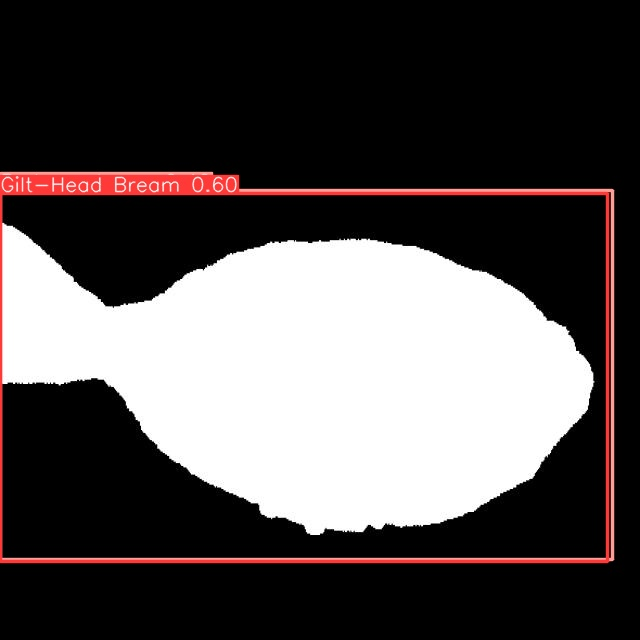

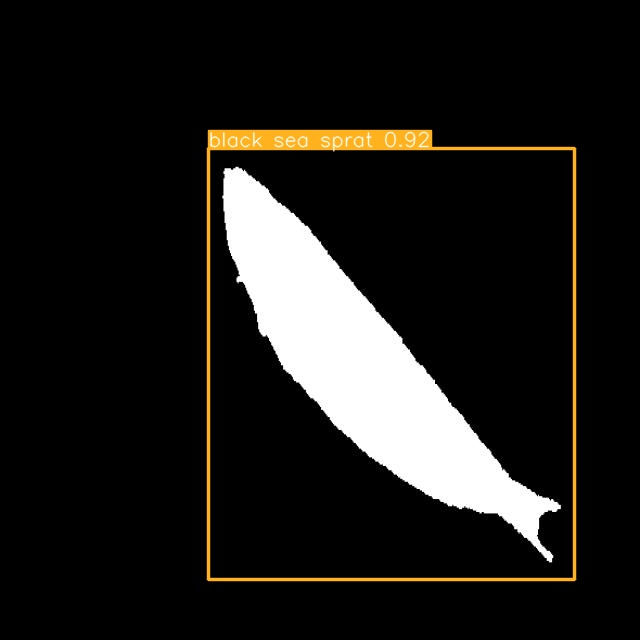

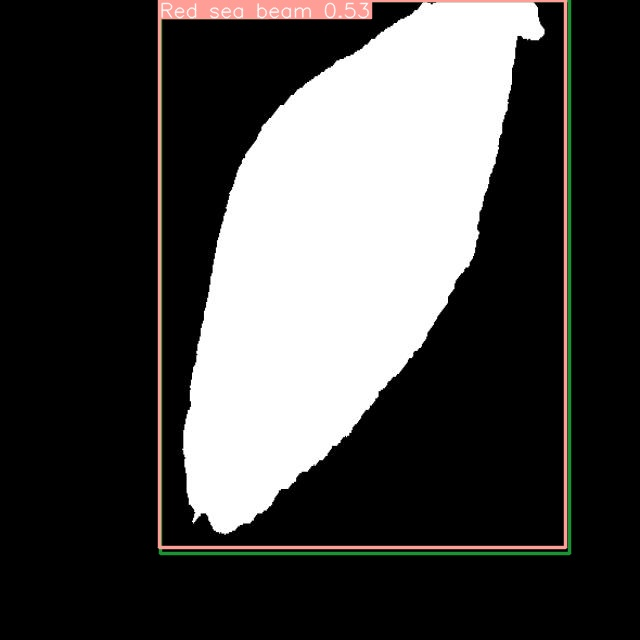

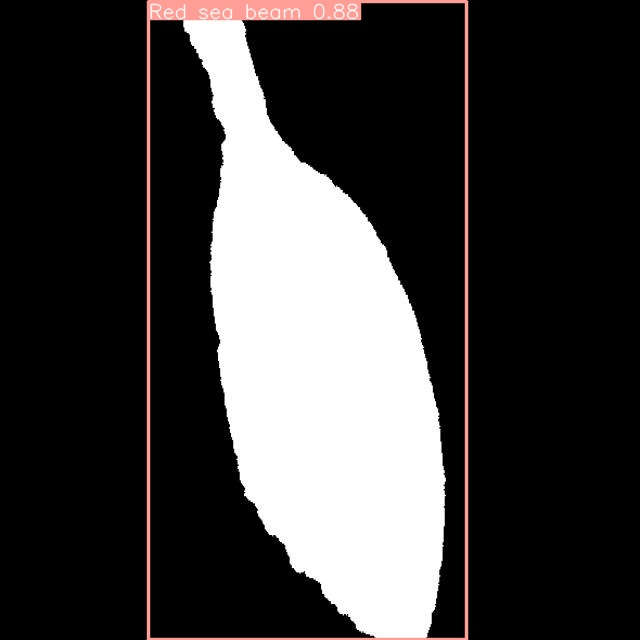

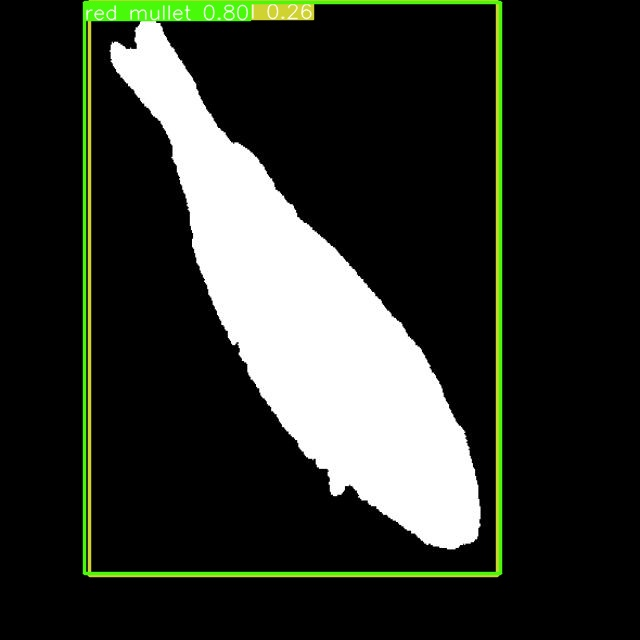

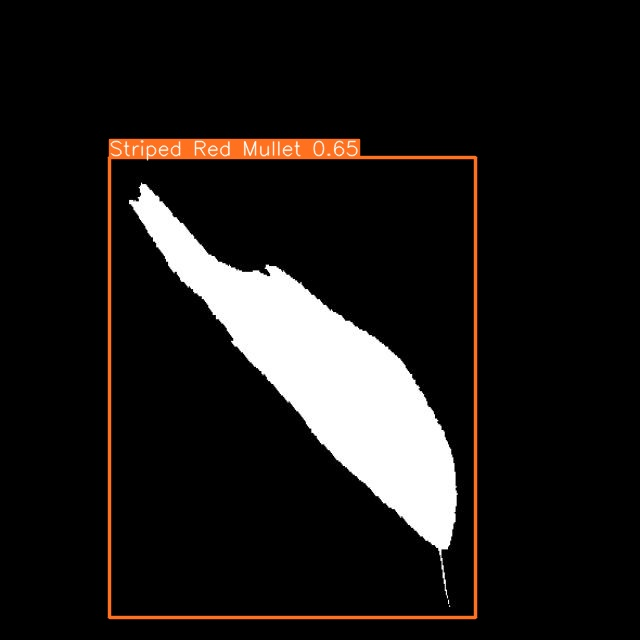

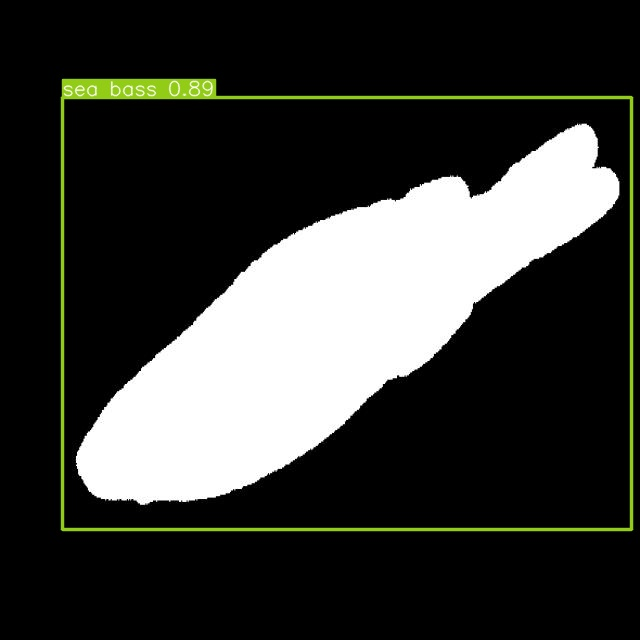

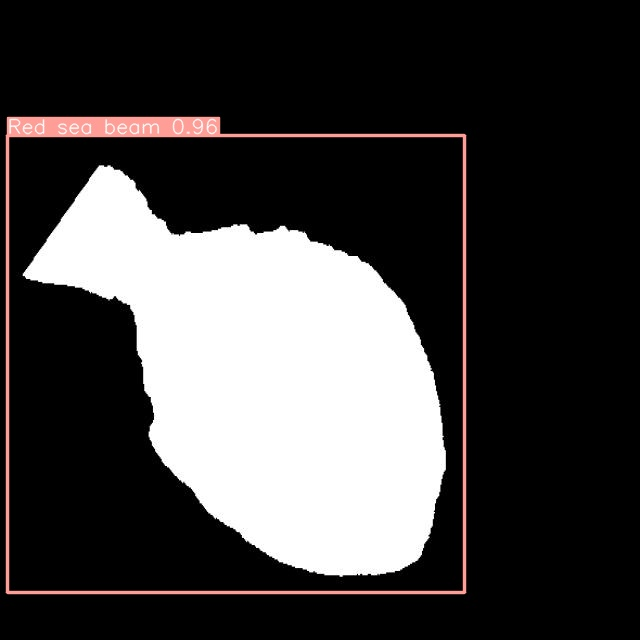

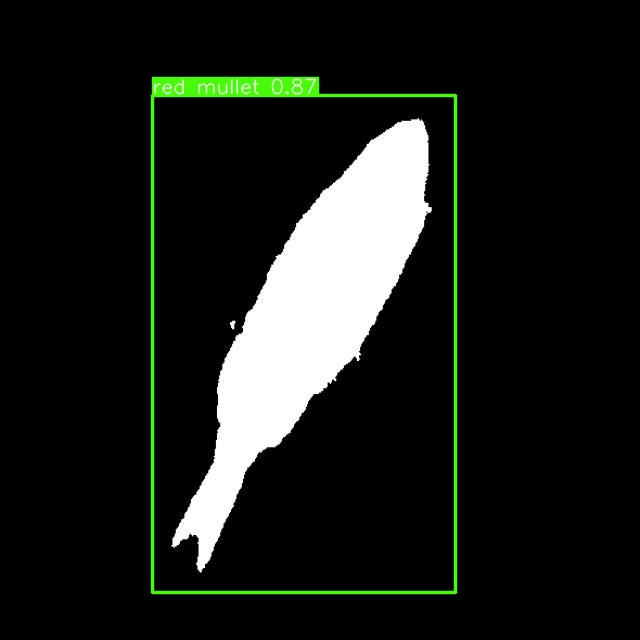

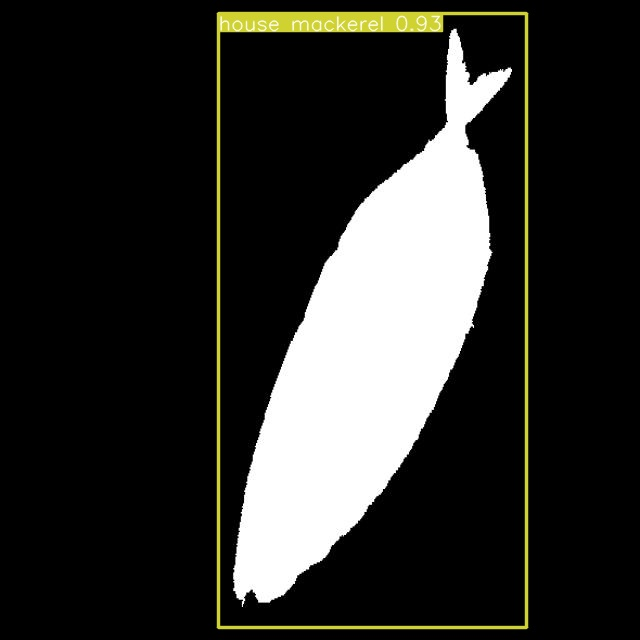

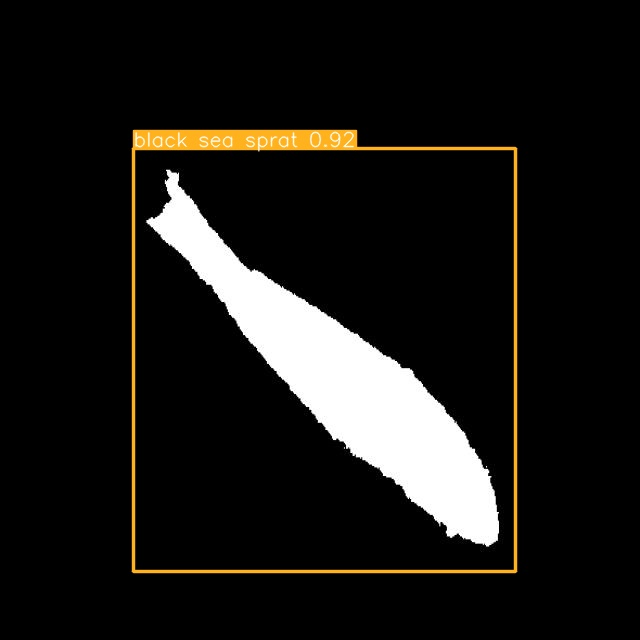

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:50]:
      display(Image(filename=image_path, width=600))
      print("\n")

TRANSFER LEARNING

In [ ]:
!pwd

/content/datasets


In [ ]:
!ls

Soumyadeep-Kar-BKL-2


In [ ]:
%cd datasets

rf2 = Roboflow(api_key="63oApJAcS0UNO3GnmcT8")
project2 = rf2.workspace("research-vpani").project("fish-detection-7efl0")
version2 = project2.version(1)
dataset2 = version2.download("yolov8")

[Errno 2] No such file or directory: 'datasets'
/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Fish-Detection-1 in yolov8:: 100%|██████████| 18012/18012 [00:05<00:00, 3147.70it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=val model=fishDetect.pt data={dataset2.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129067 parameters, 0 gradients, 28.5 GFLOPs
100% 755k/755k [00:00<00:00, 31.5MB/s]
val: Scanning /content/datasets/Fish-Detection-1/valid/labels... 1796 images, 0 backgrounds, 0 corrupt: 100% 1796/1796 [00:00<00:00, 2055.67it/s]
val: New cache created: /content/datasets/Fish-Detection-1/valid/labels.cache
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 113/113 [00:33<00:00,  3.42it/s]
                   all       1796       1796      0.992      0.997      0.994       0.77
       Gilt-Head Bream       1796        188      0.976      0.989      0.995      0.791
         Red sea brea

/content


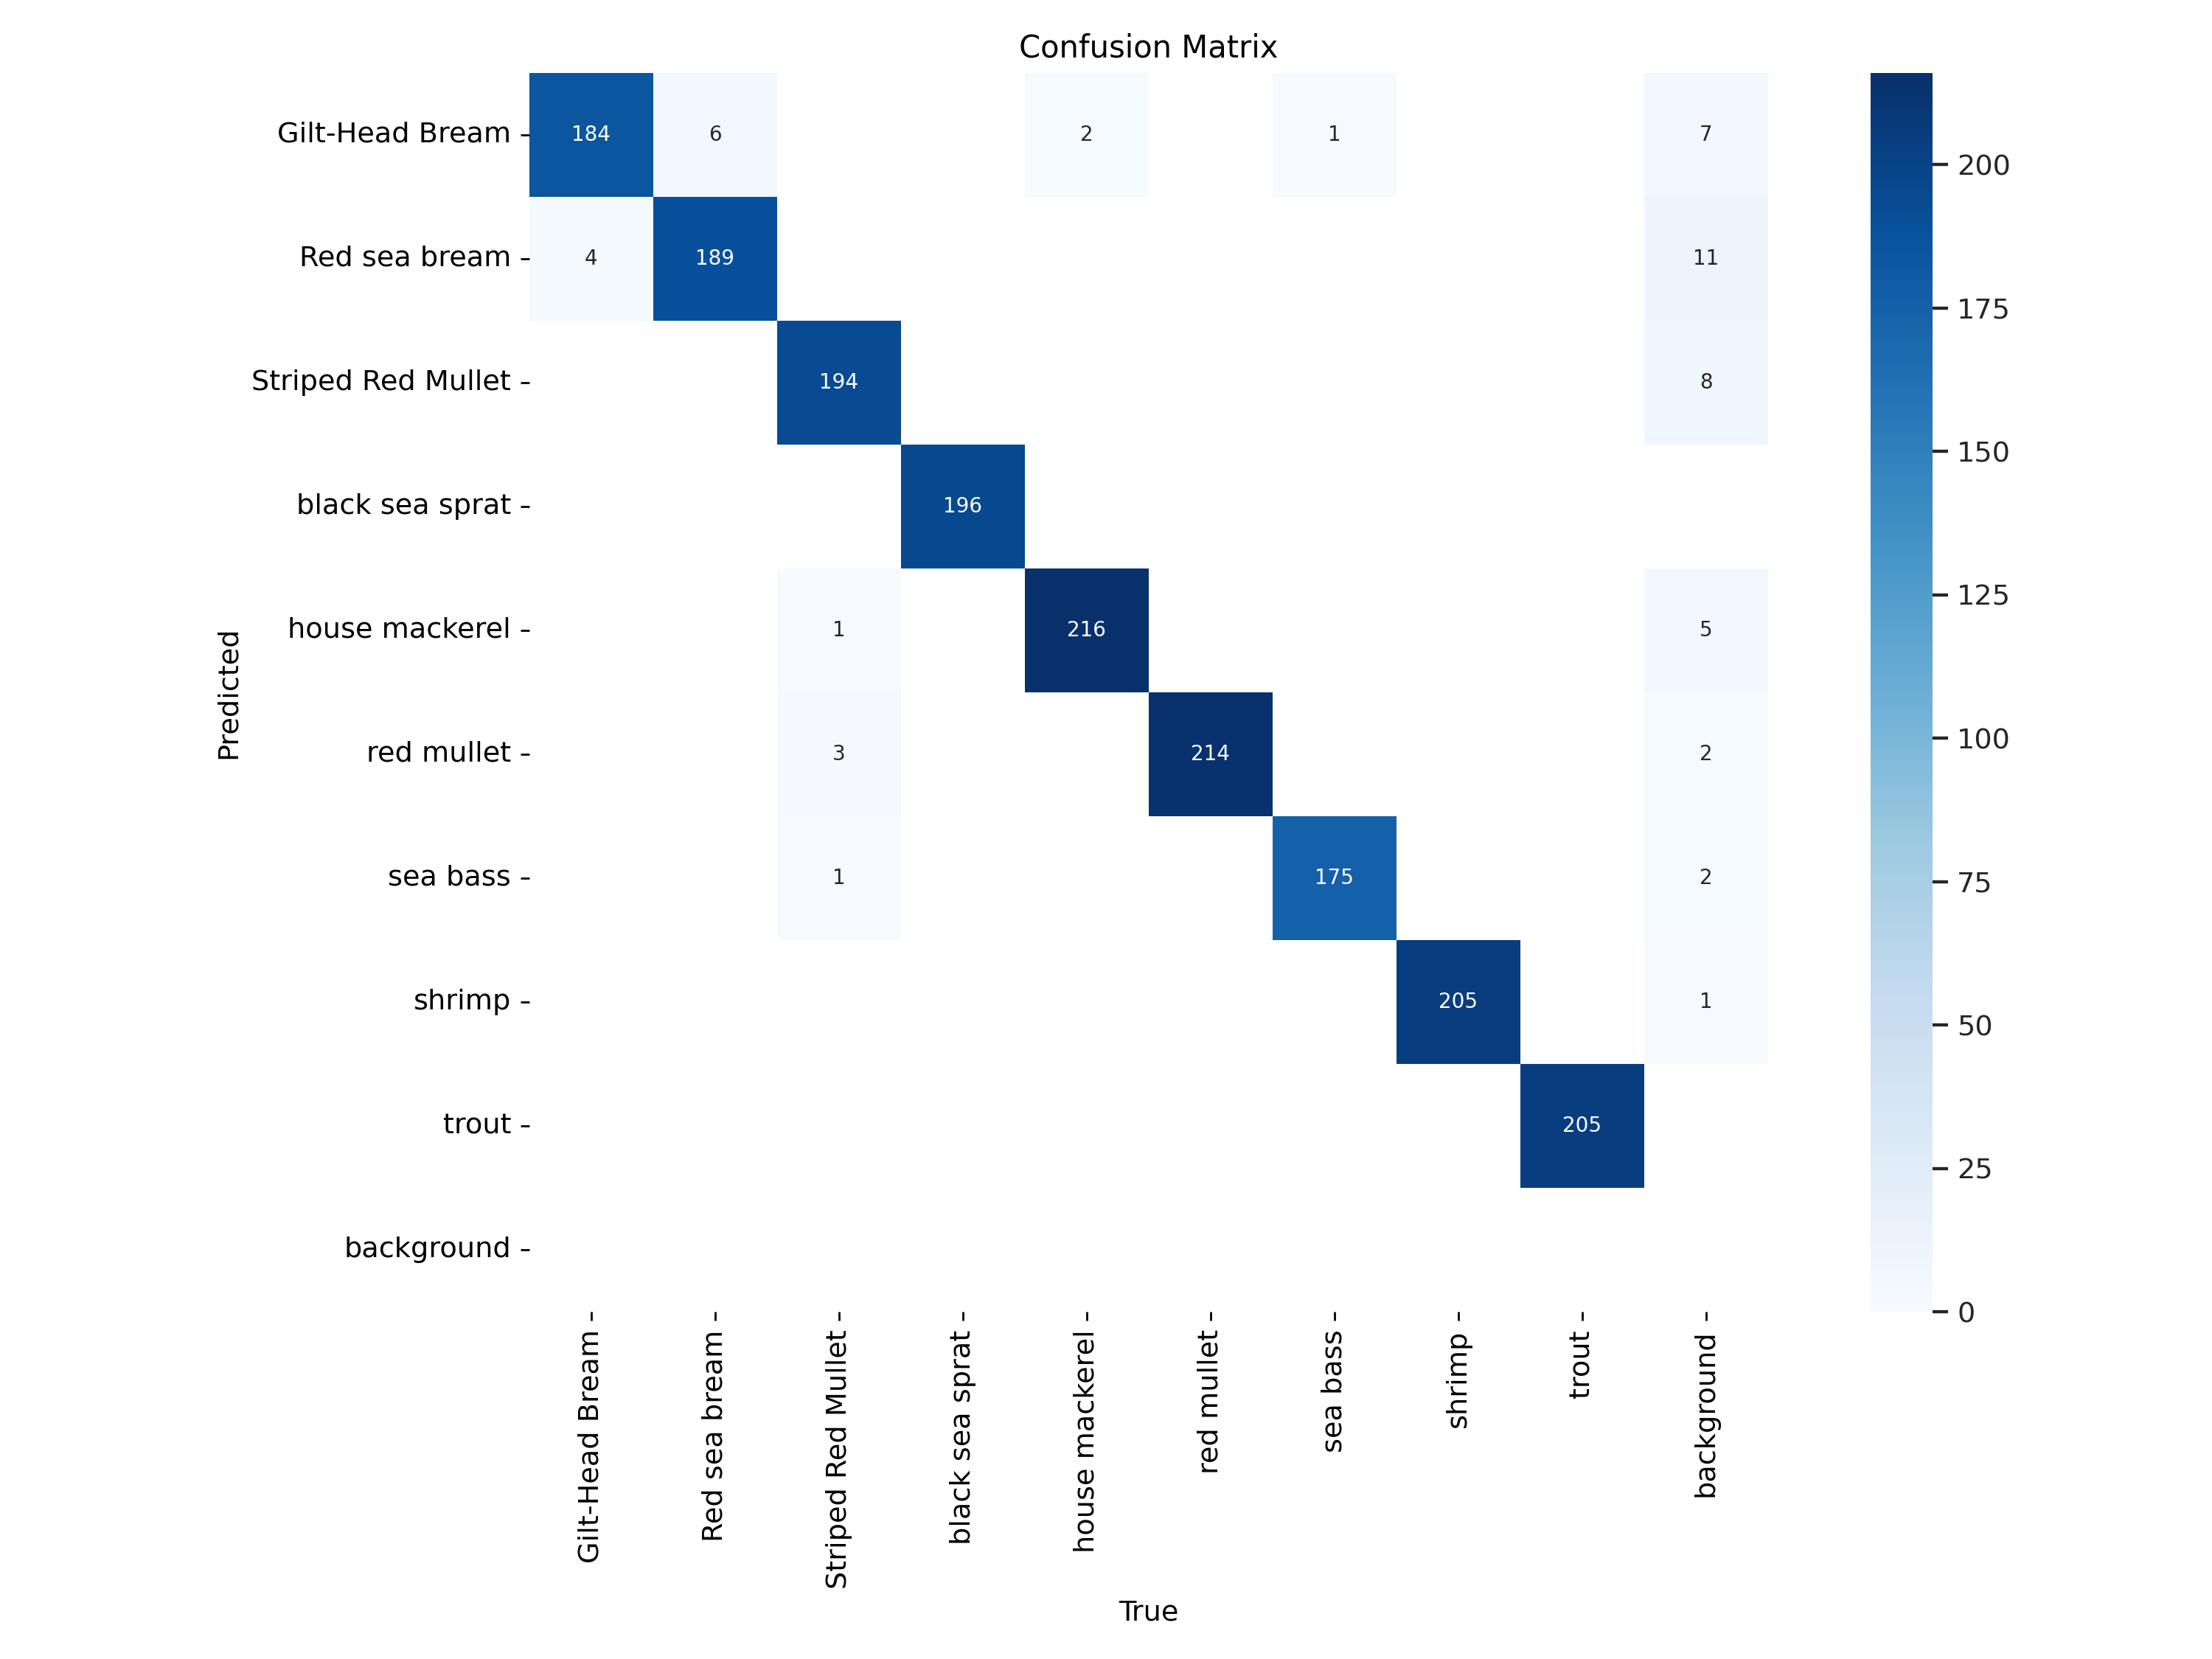

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/confusion_matrix.png', width=600)

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=fishDetect.pt source='https://norfishltd.com/app/uploads/2020/11/Horse-Mackerel.png' save=False conf=0.1

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129067 parameters, 0 gradients, 28.5 GFLOPs

Found https://norfishltd.com/app/uploads/2020/11/Horse-Mackerel.png locally at Horse-Mackerel.png
image 1/1 /content/Horse-Mackerel.png: 288x704 (no detections), 122.8ms
Speed: 2.2ms preprocess, 122.8ms inference, 61.4ms postprocess per image at shape (1, 3, 288, 704)
Results saved to runs/detect/predict12
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!pwd

/content/datasets


In [ ]:
%cd ..

!yolo task=detect mode=train model=yolov8s.pt pretrained={HOME}/runs/detect/train/weights/best.pt data={dataset2.location}/data.yaml epochs=25 imgsz=700 plots=True

/content
Transferred 349/355 items from pretrained weights
New https://pypi.org/project/ultralytics/8.1.44 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Fish-Detection-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=700, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=/content/runs/detect/train/weights/best.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_l

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

In [ ]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred